In [5]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import preprocessing

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import sklearn.metrics as metrics

In [25]:
#Sliding window prediction function with r2 score as output

def sliding_window_pred(doc_name, target_variable, rolling_window, num_months_ahead, regressor, num_features):
    test_index = num_months_ahead - 1
    pred_lst1 = []
    test_lst1 = []

    for i in doc_name.rolling(rolling_window):
        test_index += 1
        if len(i) == rolling_window and test_index < len(doc_name):
            X = i.loc[:, ~doc_name.columns.isin([target_variable, 'Month'])]
            y = i[target_variable]

            test_X = doc_name.iloc[test_index][~doc_name.columns.isin([target_variable, 'Month'])]
            test_y = doc_name.iloc[test_index][target_variable]

            test_X = np.reshape(test_X.values, (1,num_features))
            test_y = np.reshape(test_y, (1,))
            
            rf = regressor
            rf.fit(X, y)
            
            pred_y = rf.predict(test_X)
#             print(test_y, pred_y)
            pred_lst1.append(pred_y)
            test_lst1.append(test_y)

    score = r2_score(test_lst1,pred_lst1)
    
    return score

In [26]:
#Sliding window prediction function with actual vs prediction list as output

def sliding_window_pred_list(doc_name, target_variable, rolling_window, num_months_ahead):
    test_index = num_months_ahead - 1
    pred_lst1 = []
    test_lst1 = []

    for i in doc_name.rolling(rolling_window):
        test_index += 1
        if len(i) == rolling_window and test_index < len(doc_name):
            X = i.loc[:, ~doc_name.columns.isin([target_variable, 'Month'])]
            y = i[target_variable]

            test_X = doc_name.iloc[test_index][~doc_name.columns.isin([target_variable, 'Month'])]
            test_y = doc_name.iloc[test_index][target_variable]

            test_X = np.reshape(test_X.values, (1,50))
            test_y = np.reshape(test_y, (1,))
            
            rf = RandomForestRegressor()
            rf.fit(X, y)
            
            pred_y = rf.predict(test_X)
#             print(test_y, pred_y)
            pred_lst1.append(pred_y)
            test_lst1.append(test_y)

    return test_lst1, pred_lst1

In [82]:
rolling_win_lst = [1,12,24,48,72,96,120,144,168]
# rolling_win_lst = [1,12]
month_ahead_lst = [1,12]

num_features = 50

def test_model(file, rolling_win_lst, month_ahead_lst, regressor, num_features):
    results = {}

    for i in rolling_win_lst: 
        for j in month_ahead_lst:
            rv = sliding_window_pred(file, file.columns.values[1], i, j, regressor, num_features)
            print((i,j), rv)
            results[(i,j)] = rv
            
    return results

In [239]:
#Benchmark:
#Just using last month's value for the prediction
unemp_economy_topic = pd.read_csv('unemp_economy_topic.csv')
rolling_window = 1
num_months_ahead = 1

test_index = num_months_ahead - 1
pred_lst1 = []
test_lst1 = []

for i in unemp_economy_topic.rolling(rolling_window):
    test_index += num_months_ahead
    if len(i) == rolling_window and test_index < len(unemp_economy_topic):
        pred_y = unemp_economy_topic.iloc[test_index-1]['Unemployment_rate']
        test_y = unemp_economy_topic.iloc[test_index]['Unemployment_rate']

#         test_X = np.reshape(test_X.values, (1,50))
#         test_y = np.reshape(test_y, (1,))

        pred_lst1.append(pred_y)
        test_lst1.append(test_y)

r2_score(test_lst1,pred_lst1)

0.8655616726539899

In [241]:
rolling_win_lst = [1,3,6]
# rolling_win_lst = [1,12]
month_ahead_lst = [1]

test_model(unemp_economy_topic, rolling_win_lst, month_ahead_lst, regressor, 1)

(1, 1) 0.7206560715675664
(3, 1) 0.6025302089482236
(6, 1) 0.6175981216207775


{(1, 1): 0.7206560715675664,
 (3, 1): 0.6025302089482236,
 (6, 1): 0.6175981216207775}

In [214]:
#import data
gt_unemp_data_top50 = pd.read_csv('gt_unemp_data_top50.csv')
gt_unemp_data_top50_diff = pd.read_csv('gt_unemp_data_top50_diff.csv')
gt_unemp_data_top50_diff_volatility = pd.read_csv('gt_unemp_data_top50_diff_volatility.csv')
gt_unemp_data_top50_diff_precovid = pd.read_csv('gt_unemp_data_top50_diff_pre-covid.csv')

gt_lfpr_data_top50 = pd.read_csv('gt_lfpr_data_top50.csv')
gt_lfpr_data_top50_diff = pd.read_csv('gt_lfpr_data_top50_diff.csv')
gt_lfpr_data_top50_diff_volatility = pd.read_csv('gt_lfpr_data_top50_diff_volatility.csv')
gt_lfpr_data_top50_diff_precovid = pd.read_csv('gt_lfpr_data_top50_diff_pre-covid.csv')

gt_cpi_data_top50 = pd.read_csv('gt_cpi_data_top50.csv')
gt_cpi_data_top50_growth = pd.read_csv('gt_cpi_data_top50_growth.csv')
gt_cpi_data_top50_growth_volatility = pd.read_csv('gt_cpi_data_top50_growth_volatility.csv')
gt_cpi_data_top50_growth_precovid = pd.read_csv('gt_cpi_data_top50_growth_pre-covid.csv')
gt_cpi_data_top50_growth_volatility_precovid = pd.read_csv('gt_cpi_data_top50_growth_volatility_pre-covid.csv')

gt_cpi_urban_data_top50 = pd.read_csv('gt_cpi_urban_data_top50.csv')
gt_cpi_urban_data_top50_growth = pd.read_csv('gt_cpi_urban_data_top50_growth.csv')
gt_cpi_urban_data_top50_growth_volatility = pd.read_csv('gt_cpi_urban_data_top50_growth_volatility.csv')
gt_cpi_urban_data_top50_growth_precovid = pd.read_csv('gt_cpi_urban_data_top50_growth_pre-covid.csv')

gt_core_cpi_data_top50 = pd.read_csv('gt_core_cpi_data_top50.csv')
# gt_core_cpi_data_top50_growth = pd.read_csv('gt_core_cpi_data_top50_growth.csv')
# gt_core_cpi_data_top50_growth_volatility = pd.read_csv('gt_core_cpi_data_top50_growth_volatility.csv')

gt_core_cpi_urban_data_top50 = pd.read_csv('gt_core_cpi_urban_data_top50.csv')
gt_core_cpi_urban_data_top50_growth = pd.read_csv('gt_core_cpi_urban_data_top50_growth.csv')
gt_core_cpi_urban_data_top50_growth_volatility = pd.read_csv('gt_core_cpi_urban_data_top50_growth_volatility.csv')
gt_core_cpi_urban_data_top50_growth_volatility_precovid = pd.read_csv('gt_core_cpi_urban_data_top50_growth_volatility_pre-covid.csv')

gt_gdp_data_top50 = pd.read_csv('gt_gdp_data_top50.csv')
gt_gdp_data_top50_growth = pd.read_csv('gt_gdp_data_top50_growth.csv')
gt_gdp_data_top50_growth_volatility = pd.read_csv('gt_gdp_data_top50_growth_volatility.csv')
gt_gdp_data_top50_growth_precovid = pd.read_csv('gt_gdp_data_top50_growth_pre-covid.csv')

gt_gdp_percapita_data_top50 = pd.read_csv('gt_gdp_percapita_data_top50.csv')
gt_gdp_percapita_data_top50_growth = pd.read_csv('gt_gdp_percapita_data_top50_growth.csv')
gt_gdp_percapita_data_top50_growth_volatility = pd.read_csv('gt_gdp_percapita_data_top50_growth_volatility.csv')

gt_stock_data_top50 = pd.read_csv('gt_stock_data_top50.csv')
# gt_stock_data_top50_diff = pd.read_csv('gt_stock_data_top50_diff.csv')
gt_stock_data_top50_volatility = pd.read_csv('gt_stock_data_top50_volatility.csv')
gt_stock_data_top50_precovid = pd.read_csv('gt_stock_data_top50_pre-covid.csv')

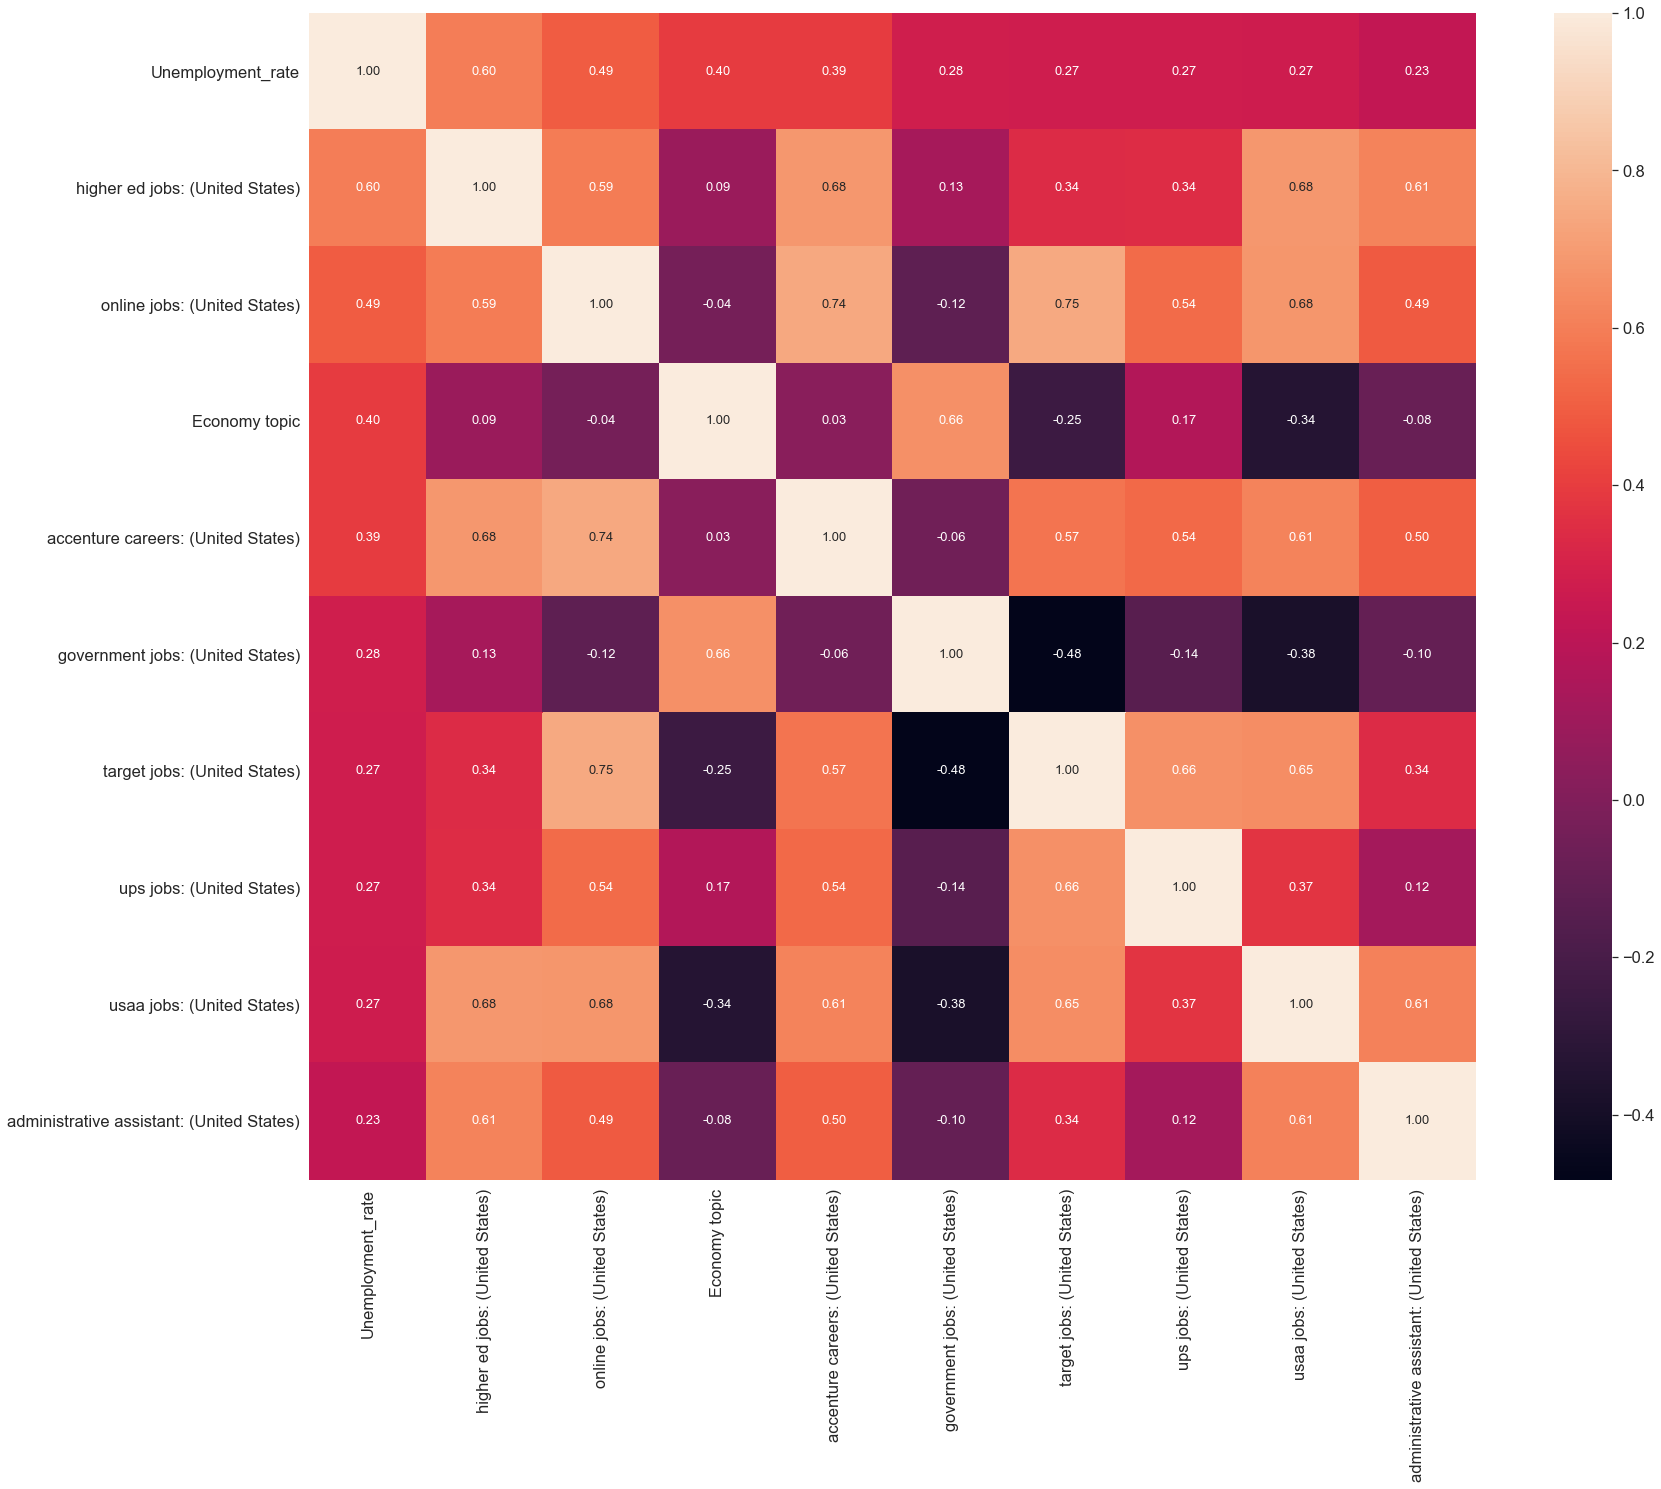

In [215]:
#unemp heatmap
corrmat1 = gt_unemp_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'Unemployment_rate')['Unemployment_rate'].index
cm = np.corrcoef(gt_unemp_data_top50[cols].values.T)
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

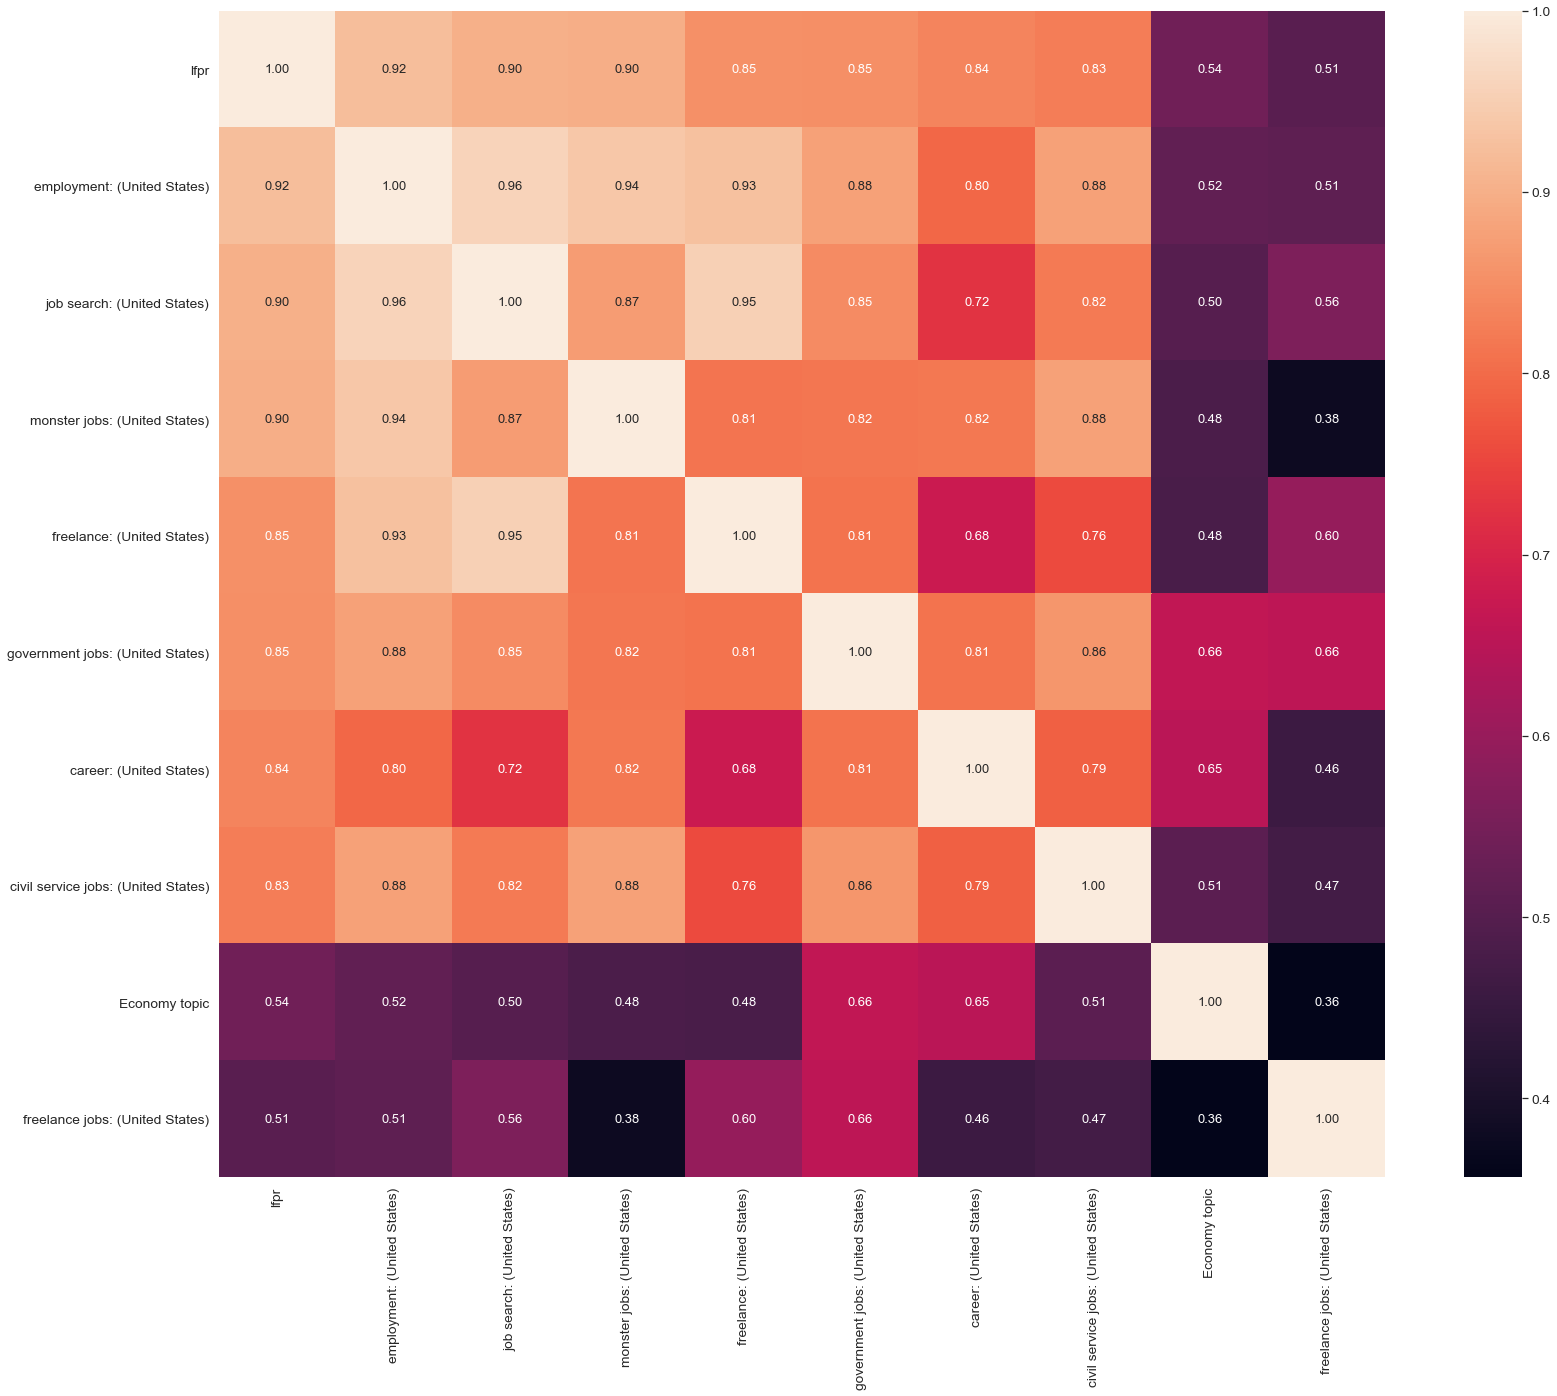

In [218]:
#lfpr heatmap
corrmat1 = gt_lfpr_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'lfpr')['lfpr'].index
cm = np.corrcoef(gt_lfpr_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [243]:
#rf models using single search term with the highest correlation
lfpr_single_employment = pd.read_csv('lfpr_single_employment.csv')

rolling_win_lst = [1,12,24,48,72,96,120,144,168]
# rolling_win_lst = [1,12]
month_ahead_lst = [1,12]

num_features = 1
regressor = RandomForestRegressor()

lfpr_single_employment_model = test_model(lfpr_single_employment, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_single_employment_model, key=lfpr_single_employment_model.get), \
      lfpr_single_employment_model[max(lfpr_single_employment_model, key=lfpr_single_employment_model.get)])


(1, 1) 0.9784269940749448
(1, 12) 0.8443797654275693
(12, 1) 0.9200678324258031
(12, 12) 0.762985071509698
(24, 1) 0.8803610608274696
(24, 12) 0.6733729510980151
(48, 1) 0.738786466619653
(48, 12) 0.27594460330162873
(72, 1) 0.40678700509176535
(72, 12) -0.43757838327468
(96, 1) 0.19733674131782675
(96, 12) -0.7080113163204045
(120, 1) 0.013312502933719328
(120, 12) -0.6184210050587351
(144, 1) 0.08995490722473498
(144, 12) -0.5507646774681618
(168, 1) 0.00618102351003047
(168, 12) -0.8967921479592897
(1, 1) 0.9784269940749448


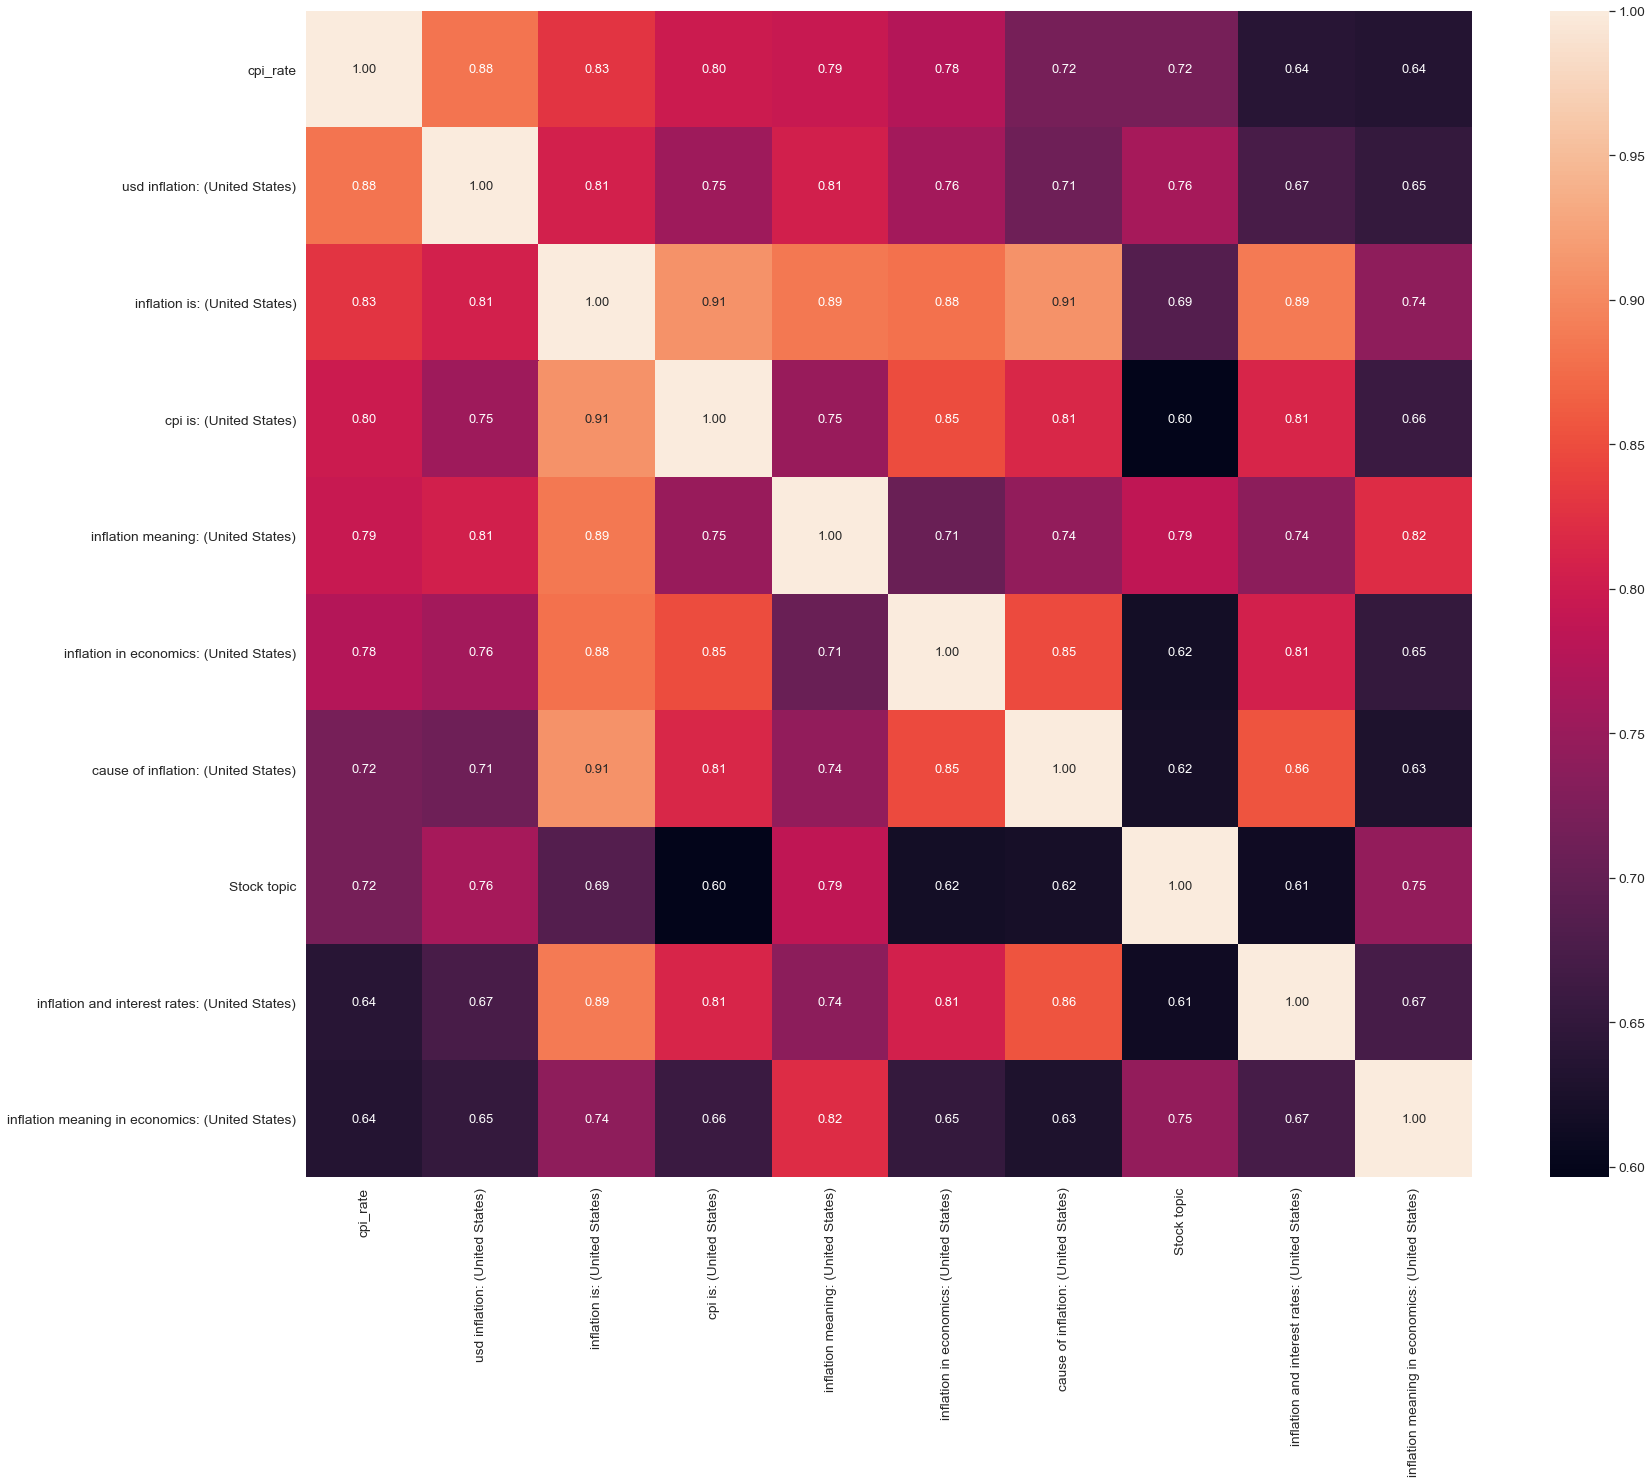

In [219]:
#cpi heatmap
corrmat1 = gt_cpi_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'cpi_rate')['cpi_rate'].index
cm = np.corrcoef(gt_cpi_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

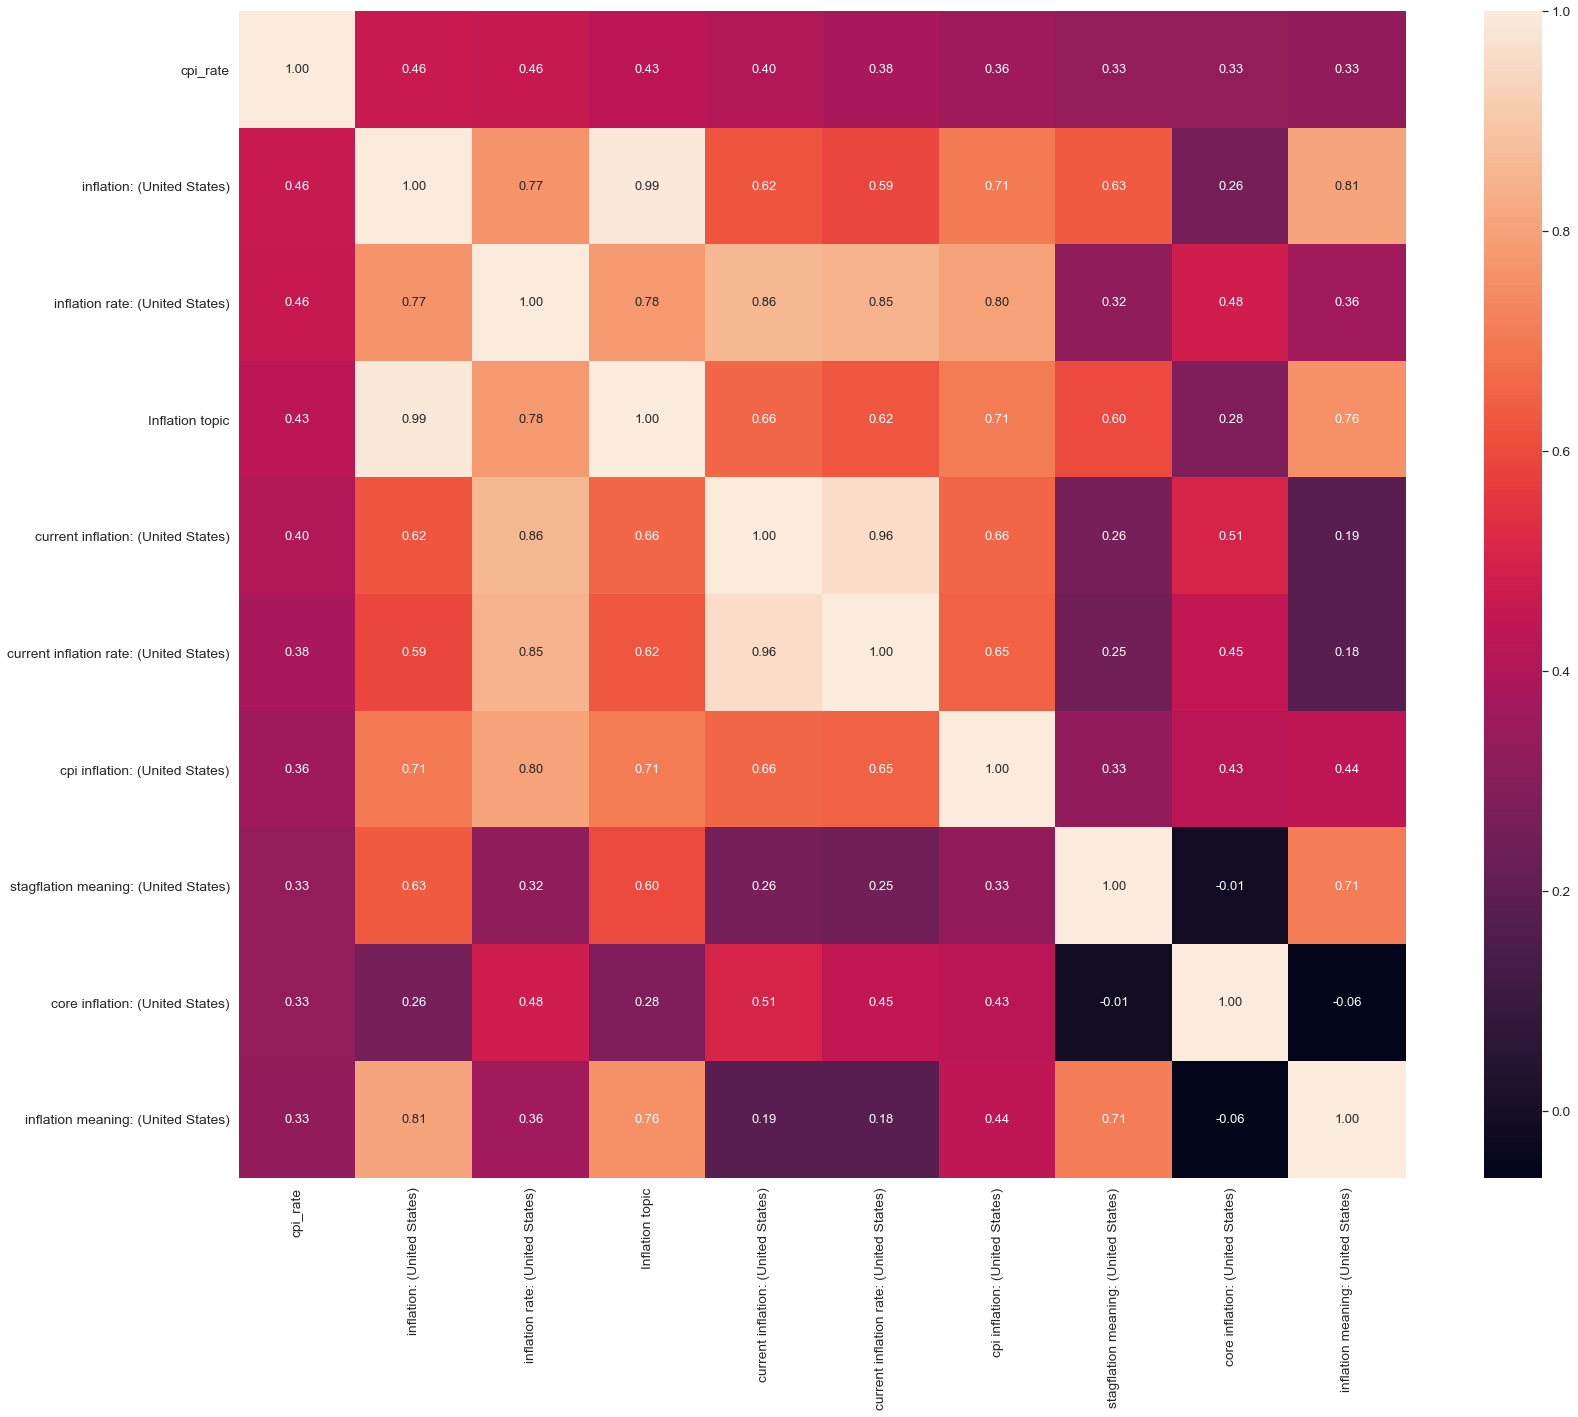

In [220]:
#core cpi heatmap
corrmat1 = gt_core_cpi_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'cpi_rate')['cpi_rate'].index
cm = np.corrcoef(gt_core_cpi_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

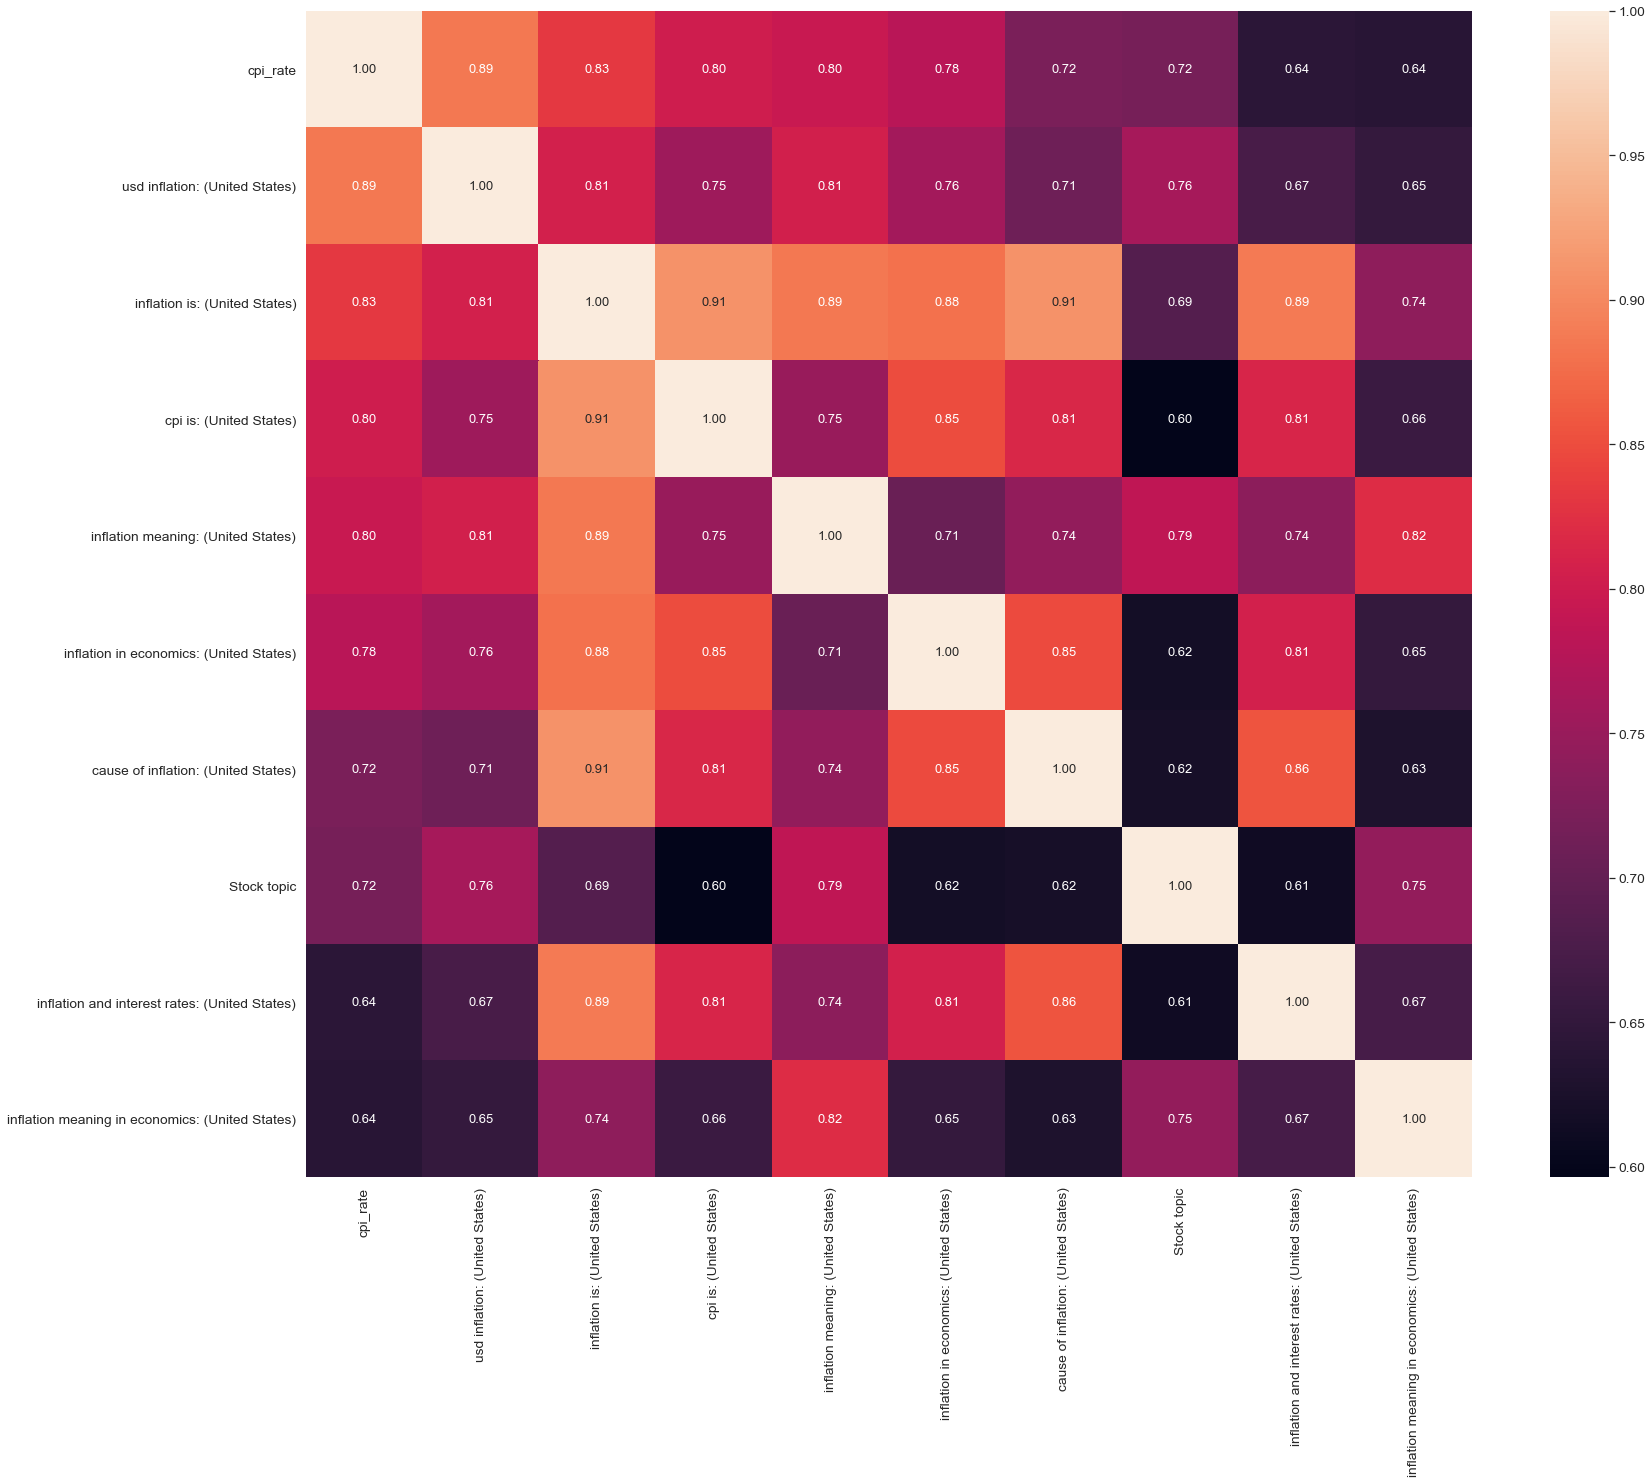

In [221]:
#urban cpi heatmap
corrmat1 = gt_cpi_urban_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'cpi_rate')['cpi_rate'].index
cm = np.corrcoef(gt_cpi_urban_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

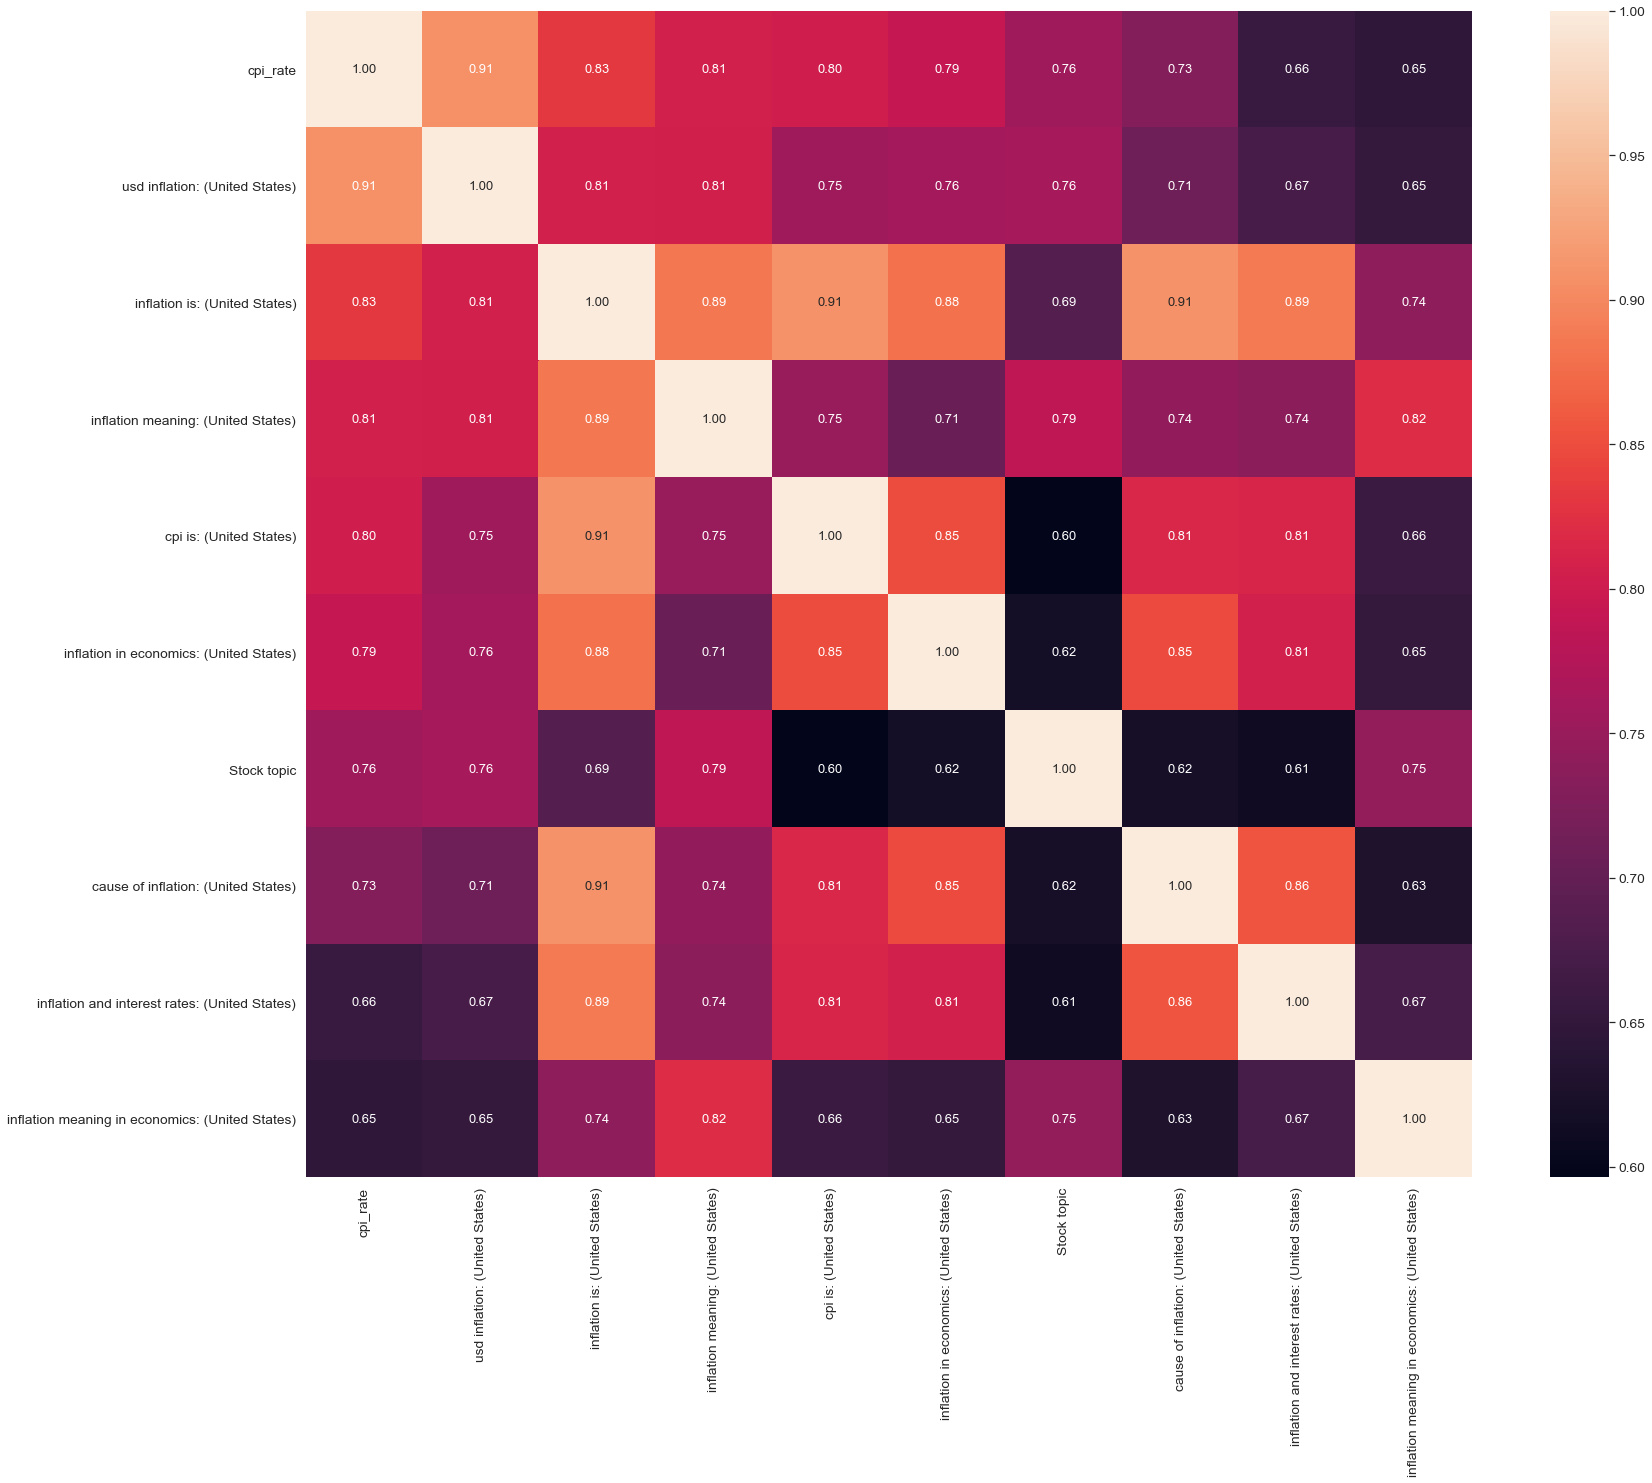

In [222]:
#core urban cpi heatmap
corrmat1 = gt_core_cpi_urban_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'cpi_rate')['cpi_rate'].index
cm = np.corrcoef(gt_core_cpi_urban_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

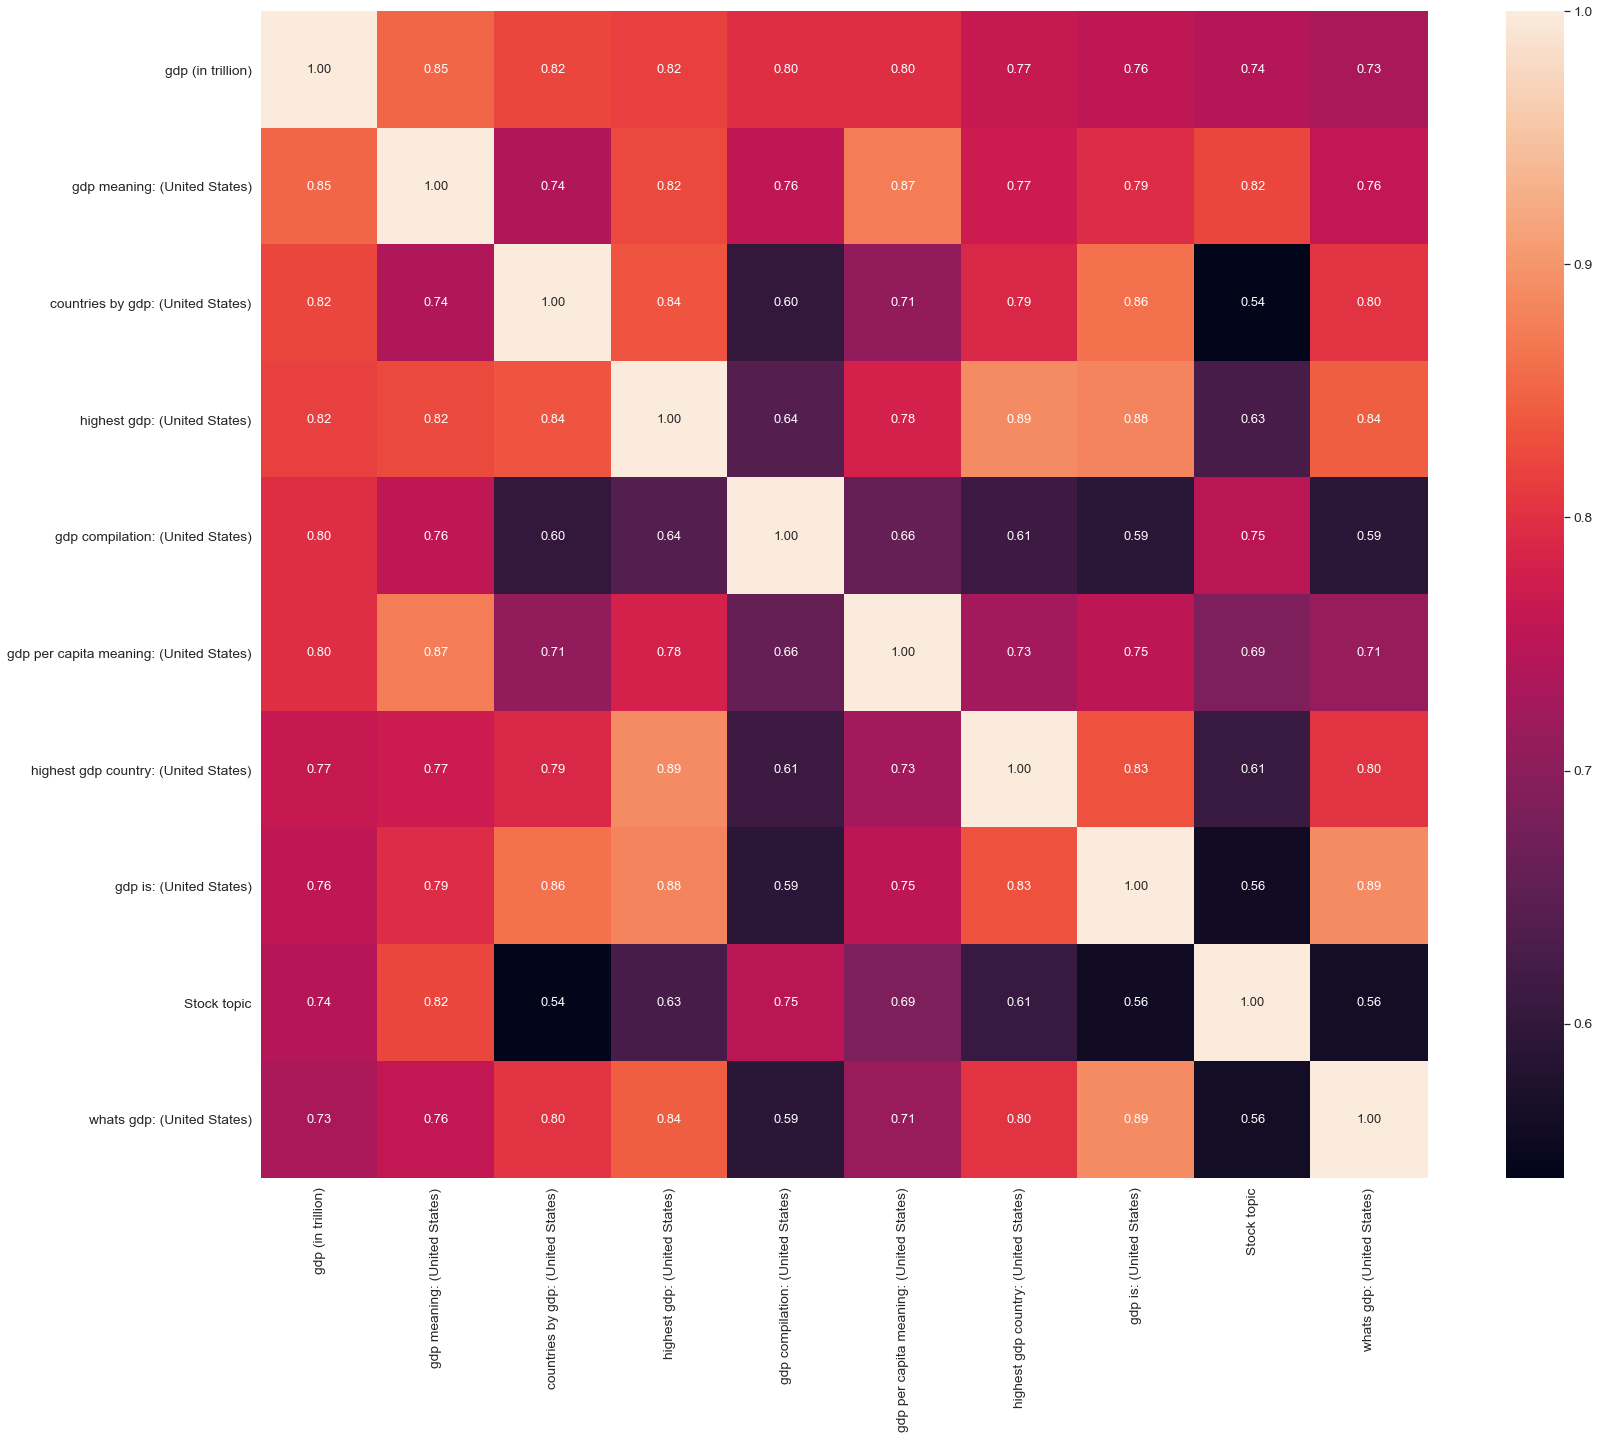

In [223]:
#gdp heatmap
corrmat1 = gt_gdp_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'gdp (in trillion)')['gdp (in trillion)'].index
cm = np.corrcoef(gt_gdp_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

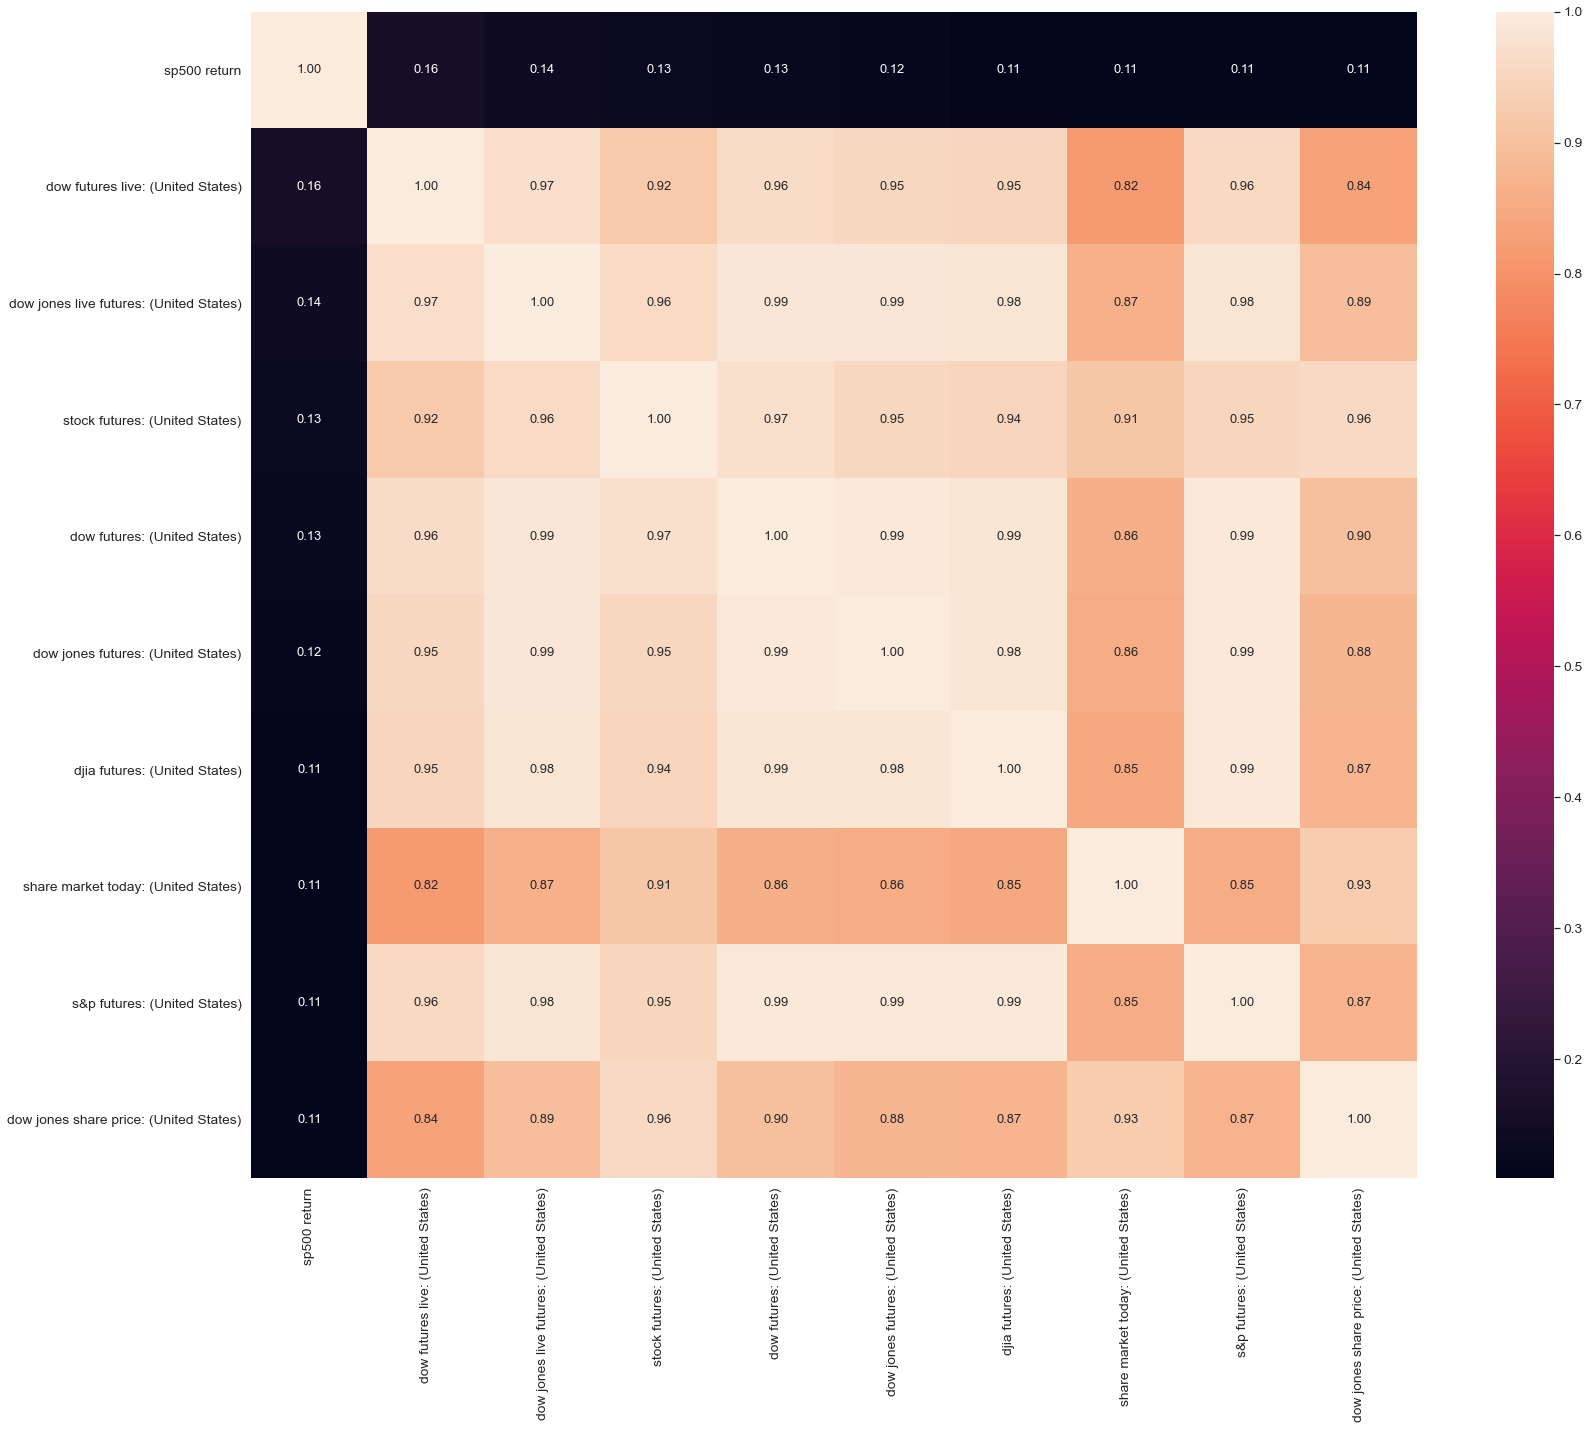

In [224]:
#stock heatmap
corrmat1 = gt_stock_data_top50.corr()
k=10
cols = corrmat1.nlargest(k, 'sp500 return')['sp500 return'].index
cm = np.corrcoef(gt_stock_data_top50[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(25, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 13}, yticklabels=cols.values, xticklabels=cols.values)
plt.show();

In [ ]:
#import data, topic


In [ ]:
#Random Forest Models
regressor = RandomForestRegressor()

In [48]:
#unemployment rate models
unemp_model = test_model(gt_unemp_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_model, key=unemp_model.get), unemp_model[max(unemp_model, key=unemp_model.get)])

(1, 1) 0.8655891402281031
(1, 12) 0.049279892842142625
(12, 1) 0.6892779594921603
(12, 12) 0.10244418421361257
(24, 1) 0.7032453309487634
(24, 12) 0.05833777185017153
(48, 1) 0.6705563426172161
(48, 12) -0.04459155042805785
(72, 1) 0.6321611219220961
(72, 12) -0.07453356273971123
(96, 1) 0.46811985249749644
(96, 12) -0.5457610396092756
(120, 1) 0.19773009847318268
(120, 12) -0.7149646790534523
(144, 1) 0.14669181039975165
(144, 12) -0.5294000219190307
(168, 1) 0.3279917399344171
(168, 12) -0.8684172668461332
(180, 1) 0.2550041735304259
(180, 12) -1.397968599523769
(192, 1) 0.07547445944713138
(192, 12) -8.845790796019905
(1, 1) 0.8655891402281031


In [51]:
unemp_diff_model = test_model(gt_unemp_data_top50_diff, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_model, key=unemp_diff_model.get), unemp_diff_model[max(unemp_diff_model, key=unemp_diff_model.get)])

(1, 1) -0.9457041076773318
(1, 12) -1.0104347502820086
(12, 1) 0.023079537844267084
(12, 12) -0.13797054690992727
(24, 1) -0.06244252634768044
(24, 12) -0.08872069651367598
(48, 1) -0.06741630911396679
(48, 12) -0.21026356524025558
(72, 1) -0.15474994652143725
(72, 12) -0.1558534962668645
(96, 1) -0.15052510016697318
(96, 12) -0.32050237492809464
(120, 1) -0.08951750559021177
(120, 12) -0.24055493406322315
(144, 1) -0.08400458272602918
(144, 12) -0.2041521693899666
(168, 1) -0.16184718831677136
(168, 12) -0.3083384060655616
(180, 1) -0.12320565758992985
(180, 12) -0.29141664449617544
(192, 1) -0.19185795632249336
(192, 12) -73.05769744318188
(12, 1) 0.023079537844267084


In [53]:
unemp_diff_v_model = test_model(gt_unemp_data_top50_diff_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_model, key=unemp_diff_v_model.get), unemp_diff_v_model[max(unemp_diff_v_model, key=unemp_diff_v_model.get)])

(1, 1) -0.5272789552456105
(1, 12) -1.0416401199317398
(12, 1) -0.002421065332897099
(12, 12) -0.28578512478850526
(24, 1) -0.0007543906066904693
(24, 12) -0.33212127930687774
(48, 1) -0.04397232222714487
(48, 12) -0.38212194882755
(72, 1) -0.033523177731241915
(72, 12) -0.320943096839861
(96, 1) -0.0907772199043142
(96, 12) -0.39681969934546446
(120, 1) -0.1288486890963514
(120, 12) -0.5499629025624999
(144, 1) -0.1609420891389306
(144, 12) -0.4708732722371354
(168, 1) -0.12968597182620045
(168, 12) -0.48110967599175836
(180, 1) -0.18458797462055276
(180, 12) -0.6535867856671504
(192, 1) -0.26563005134527673
(192, 12) -146.29830568181828
(24, 1) -0.0007543906066904693


In [83]:
unemp_diff_prec_model = test_model(gt_unemp_data_top50_diff_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_prec_model, key=unemp_diff_prec_model.get), \
      unemp_diff_prec_model[max(unemp_diff_prec_model, key=unemp_diff_prec_model.get)])

(1, 1) -0.6017174114145498
(1, 12) -1.032664305391576
(12, 1) 0.042346320346320465
(12, 12) -0.30151108962801265
(24, 1) -0.014078851702250539
(24, 12) -0.32665371529238496
(48, 1) 0.06863740987620714
(48, 12) -0.48743049841772135
(72, 1) -0.41735424393345344
(72, 12) -0.5487385129659645
(96, 1) -0.38993734939759017
(96, 12) -0.3899146569161347
(120, 1) -0.35886928263512785
(120, 12) -0.43146666666666644
(144, 1) -0.39836475770925084
(144, 12) -0.09586819407008074
(168, 1) -0.41802764015645355
(168, 12) -0.10832447916666688
(48, 1) 0.06863740987620714


In [55]:
#lfpr models
lfpr_model = test_model(gt_lfpr_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_model, key=lfpr_model.get), lfpr_model[max(lfpr_model, key=lfpr_model.get)])

(1, 1) 0.9784269940749448
(1, 12) 0.8443797654275693
(12, 1) 0.9522427291905181
(12, 12) 0.8096075218173129
(24, 1) 0.9422517271454682
(24, 12) 0.7477255424801237
(48, 1) 0.915953975322723
(48, 12) 0.5418687683759891
(72, 1) 0.8337602155810719
(72, 12) 0.13048662477558448
(96, 1) 0.7012259541746833
(96, 12) -0.18821156064389322
(120, 1) 0.6093784029614255
(120, 12) -0.30612969066371964
(144, 1) 0.6420934484274836
(144, 12) -0.2853026419712408
(168, 1) 0.5708567221857291
(168, 12) -0.5559655405405273
(180, 1) 0.5023466300229056
(180, 12) -1.973980990348255
(192, 1) -0.05541227201667098
(192, 12) -9.88419372365366
(1, 1) 0.9784269940749448


In [56]:
lfpr_diff_model = test_model(gt_lfpr_data_top50_diff, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_model, key=lfpr_diff_model.get), lfpr_diff_model[max(lfpr_diff_model, key=lfpr_diff_model.get)])

(1, 1) -1.0210775683722924
(1, 12) -1.045556591717609
(12, 1) -0.1384073843815854
(12, 12) -0.23491043201191775
(24, 1) -0.12764979110051322
(24, 12) -0.24392413618892905
(48, 1) -0.04558595379784425
(48, 12) -0.3421398000238072
(72, 1) -0.08705121370327507
(72, 12) -0.3047494324414928
(96, 1) -0.13304811939786454
(96, 12) -0.28572582164136207
(120, 1) -0.10676545649354341
(120, 12) -0.2922399021617841
(144, 1) -0.1294508311749465
(144, 12) -0.294513022941971
(168, 1) -0.06523020932561563
(168, 12) -0.2860267520215636
(180, 1) -0.033400428858905595
(180, 12) -0.255309669211196
(192, 1) -0.09879075927015868
(192, 12) -9.00931249999989
(180, 1) -0.033400428858905595


In [57]:
lfpr_diff_v_model = test_model(gt_lfpr_data_top50_diff_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_model, key=lfpr_diff_v_model.get), lfpr_diff_v_model[max(lfpr_diff_v_model, key=lfpr_diff_v_model.get)])

(1, 1) -0.31696551724137834
(1, 12) -0.9676778999976647
(12, 1) 0.04736895069945579
(12, 12) -0.37925605706939014
(24, 1) -0.03578458743966273
(24, 12) -0.3949348375113586
(48, 1) -0.0054259113214163435
(48, 12) -0.6187408118983755
(72, 1) -0.08112558927881408
(72, 12) -0.525455857525422
(96, 1) -0.07200415178329078
(96, 12) -0.523156690784097
(120, 1) 0.0029329922129484043
(120, 12) -0.4552842347085291
(144, 1) -0.057260691985044465
(144, 12) -0.589288961566222
(168, 1) -0.042587269898124225
(168, 12) -0.7432808972166065
(180, 1) -0.10856852155155217
(180, 12) -0.7009911680742249
(192, 1) -0.1442198363501117
(192, 12) -30.234193181818192
(12, 1) 0.04736895069945579


In [84]:
lfpr_diff_prec_model = test_model(gt_lfpr_data_top50_diff_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_prec_model, key=lfpr_diff_prec_model.get), \
      lfpr_diff_prec_model[max(lfpr_diff_prec_model, key=lfpr_diff_prec_model.get)])

(1, 1) -1.3740177477665871
(1, 12) -1.1015348288075533
(12, 1) -0.3355566706021249
(12, 12) -0.2682881818181817
(24, 1) -0.3285931308175194
(24, 12) -0.2131027537624075
(48, 1) -0.24980232648313283
(48, 12) -0.2291446114247755
(72, 1) -0.35916525606082317
(72, 12) -0.40848273076544195
(96, 1) -0.36803226641998155
(96, 12) -0.34962650085763314
(120, 1) -0.47079480890582226
(120, 12) -0.464703214405924
(144, 1) -0.45838448625180894
(144, 12) -0.6208323336457362
(168, 1) -0.6765743884892088
(168, 12) -1.7224507142857153
(24, 12) -0.2131027537624075


In [58]:
#cpi models
cpi_model = test_model(gt_cpi_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_model, key=cpi_model.get), cpi_model[max(cpi_model, key=cpi_model.get)])

(1, 1) 0.9979689088352011
(1, 12) 0.9111761393211668
(12, 1) 0.97359916026955
(12, 12) 0.8451509165274904
(24, 1) 0.9569864274856982
(24, 12) 0.7732293068688101
(48, 1) 0.9197541387661992
(48, 12) 0.7142496447263685
(72, 1) 0.8953758481651232
(72, 12) 0.5515856651456519
(96, 1) 0.8641722935186056
(96, 12) 0.4431124792188793
(120, 1) 0.8294078840675844
(120, 12) 0.2892764147388167
(144, 1) 0.7681467157046016
(144, 12) -0.35604891543106
(168, 1) 0.560914943064178
(168, 12) -1.3044066367300764
(180, 1) 0.4811817532396877
(180, 12) -2.361109157109447
(192, 1) 0.31949962032517765
(192, 12) -6.0636087937118255
(1, 1) 0.9979689088352011


In [59]:
cpi_growth_model = test_model(gt_cpi_data_top50_growth, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_model, key=cpi_growth_model.get), cpi_growth_model[max(cpi_growth_model, key=cpi_growth_model.get)])

(1, 1) 0.11879044145036433
(1, 12) -0.38365855178687314
(12, 1) 0.02967513669968902
(12, 12) -0.20530762736704333
(24, 1) -0.046435642929052445
(24, 12) -0.1048397308380149
(48, 1) 0.04830750446646703
(48, 12) -0.05089249250188832
(72, 1) 0.12182219136593198
(72, 12) 0.01148058405523611
(96, 1) 0.2299111363825571
(96, 12) 0.07007795329441402
(120, 1) 0.2170397298588972
(120, 12) 0.054941107593243776
(144, 1) 0.2749888876707418
(144, 12) -0.031090918340325624
(168, 1) 0.10981573480325246
(168, 12) -0.7551106965420538
(180, 1) 0.21078468015664675
(180, 12) -0.6960683257087683
(192, 1) 0.09431357195510359
(192, 12) -3.900423865815946
(144, 1) 0.2749888876707418


In [60]:
cpi_growth_v_model = test_model(gt_cpi_data_top50_growth_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_model, key=cpi_growth_v_model.get), cpi_growth_v_model[max(cpi_growth_v_model, key=cpi_growth_v_model.get)])

(1, 1) 0.11879048479790322
(1, 12) -0.3836584253862274
(12, 1) -0.008288592107162929
(12, 12) -0.21407431524949816
(24, 1) -0.004787470426755425
(24, 12) -0.09148607521844787
(48, 1) 0.08014452478024758
(48, 12) -0.05792268606953166
(72, 1) 0.1175475905441341
(72, 12) 0.04803335266337028
(96, 1) 0.1886434425571144
(96, 12) 0.04292597772701501
(120, 1) 0.22978980205559052
(120, 12) 0.08406701418803109
(144, 1) 0.23939541162691502
(144, 12) -0.07596958325210679
(168, 1) 0.1765373501273343
(168, 12) -0.8257846849797845
(180, 1) 0.13637563638126604
(180, 12) -0.5530809654682296
(192, 1) 0.20047296623126232
(192, 12) -3.6695808439189914
(144, 1) 0.23939541162691502


In [85]:
cpi_growth_prec_model = test_model(gt_cpi_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_prec_model, key=cpi_growth_prec_model.get), \
      cpi_growth_prec_model[max(cpi_growth_prec_model, key=cpi_growth_prec_model.get)])

(1, 1) 0.11879048479790322
(1, 12) -0.3836584253862274
(12, 1) 0.01881780135573563
(12, 12) -0.2028374211764843
(24, 1) -0.0009254817610155897
(24, 12) -0.07920969745747053
(48, 1) 0.06503345162039642
(48, 12) -0.03209408656257651
(72, 1) 0.13915984908232149
(72, 12) 0.02715819578061629
(96, 1) 0.22828671332507022
(96, 12) 0.0699068730839989
(120, 1) 0.26435444386478113
(120, 12) 0.05505404126573121
(144, 1) 0.2689589748065446
(144, 12) 0.03275547275567747
(168, 1) 0.26069934904907255
(168, 12) -0.8825505581458042
(144, 1) 0.2689589748065446


In [86]:
cpi_growth_v_prec_model = test_model(gt_cpi_data_top50_growth_volatility_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_prec_model, key=cpi_growth_v_prec_model.get), \
      cpi_growth_v_prec_model[max(cpi_growth_v_prec_model, key=cpi_growth_v_prec_model.get)])

(1, 1) -0.1346086557409727
(1, 12) -0.6632521217714915
(12, 1) -0.029855018648814458
(12, 12) -0.2238278483848537
(24, 1) -0.07683811498394855
(24, 12) -0.16554756984140795
(48, 1) -0.019985698630113014
(48, 12) -0.5196191629108486
(72, 1) -0.2821338868918757
(72, 12) -0.041242125907118066
(96, 1) -0.08868519293928578
(96, 12) -0.1890104304570961
(120, 1) -0.01882317323419347
(120, 12) -0.1276474885684742
(144, 1) -0.020965393880071792
(144, 12) -0.06899204762921518
(168, 1) 0.18461604929522257
(168, 12) 0.2889838829811612
(168, 12) 0.2889838829811612


In [61]:
#cpi urban models
cpi_urban_model = test_model(gt_cpi_urban_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_model, key=cpi_urban_model.get), cpi_urban_model[max(cpi_urban_model, key=cpi_urban_model.get)])

(1, 1) 0.9984977995832259
(1, 12) 0.911501843708471
(12, 1) 0.9767471217650162
(12, 12) 0.8448324690437665
(24, 1) 0.9583638453841928
(24, 12) 0.7794475959996894
(48, 1) 0.9267597311864059
(48, 12) 0.7111870935519873
(72, 1) 0.9006104388265008
(72, 12) 0.5471822342513186
(96, 1) 0.8676558939018078
(96, 12) 0.4470049964846323
(120, 1) 0.8337076146660379
(120, 12) 0.2898381063776061
(144, 1) 0.7758311461762071
(144, 12) -0.34007375369132786
(168, 1) 0.5840137489556354
(168, 12) -1.2441279763278428
(180, 1) 0.498184870538426
(180, 12) -2.14334438070625
(192, 1) 0.4167151554412113
(192, 12) -6.0483292350953235
(1, 1) 0.9984977995832259


In [62]:
cpi_urban_growth_model = test_model(gt_cpi_urban_data_top50_growth, \
                                    rolling_win_lst, month_ahead_lst, regressor, num_features)

print(max(cpi_urban_growth_model, key=cpi_urban_growth_model.get), \
      cpi_urban_growth_model[max(cpi_urban_growth_model, key=cpi_urban_growth_model.get)])

(1, 1) 0.07366300571713857
(1, 12) -1.0739274175507951
(12, 1) -0.07717923056164655
(12, 12) -0.5056992359352699
(24, 1) -0.0781878099416966
(24, 12) -0.4038018003302022
(48, 1) -0.07741979699785428
(48, 12) -0.5691174180737588
(72, 1) -0.009853354721572893
(72, 12) -0.3931242610300021
(96, 1) 0.17012491978985356
(96, 12) -0.46381524462470125
(120, 1) 0.12635091770350337
(120, 12) -0.5309066825118678
(144, 1) 0.22490512560825182
(144, 12) -0.8025605224299157
(168, 1) 0.15800718253232615
(168, 12) -1.4953544740908153
(180, 1) 0.08598094843181514
(180, 12) -1.416487753124629
(192, 1) 0.11462891666024089
(192, 12) -7.6874773111071
(144, 1) 0.22490512560825182


In [63]:
cpi_urban_growth_v_model = test_model(gt_cpi_urban_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_v_model, key=cpi_urban_growth_v_model.get), \
      cpi_urban_growth_v_model[max(cpi_urban_growth_v_model, key=cpi_urban_growth_v_model.get)])

(1, 1) -1.0092592601996504
(1, 12) -1.009756099397599
(12, 1) -0.4632029275888334
(12, 12) -0.43636598110733704
(24, 1) -0.34593782433448617
(24, 12) -0.38034285762076103
(48, 1) -0.2520650890501166
(48, 12) -0.24704303837299646
(72, 1) -0.3109793106188832
(72, 12) -0.489936566664686
(96, 1) -0.6609140500419064
(96, 12) -1.1166690920092686
(120, 1) -0.3345175267252396
(120, 12) -0.4113220933182842
(144, 1) -1.4000900191385036e+16
(144, 12) -7700447943942077.0
(168, 1) -358261846890388.8
(168, 12) -148565700034582.72
(180, 1) -179400638858479.7
(180, 12) -24418124856495.008
(192, 1) -223057723842009.12
(192, 12) -119649731406298.14
(48, 12) -0.24704303837299646


In [87]:
cpi_urban_growth_prec_model = test_model(gt_cpi_urban_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_prec_model, key=cpi_urban_growth_prec_model.get), \
      cpi_urban_growth_prec_model[max(cpi_urban_growth_prec_model, key=cpi_urban_growth_prec_model.get)])

(1, 1) -0.0927032112371593
(1, 12) -1.2807179869080474
(12, 1) -0.1357707305973399
(12, 12) -0.34605830474095467
(24, 1) -0.16860209366374268
(24, 12) -0.23133650128681627
(48, 1) -0.16115369155237347
(48, 12) -0.5502231708665002
(72, 1) -0.44912529857543526
(72, 12) -0.26068775832199953
(96, 1) -0.16974500610822796
(96, 12) -0.4208642726490799
(120, 1) -0.2392092009088611
(120, 12) -0.46778069439854875
(144, 1) -0.5045119232635045
(144, 12) -0.5881553007562299
(168, 1) -0.26611415381428105
(168, 12) -0.24060851110538217
(1, 1) -0.0927032112371593


In [64]:
#core cpi models
core_cpi_model = test_model(gt_core_cpi_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_model, key=core_cpi_model.get), \
      core_cpi_model[max(core_cpi_model, key=core_cpi_model.get)])


(1, 1) 0.9566538479317495
(1, 12) -0.3256107660592358
(12, 1) 0.63848336809235
(12, 12) -0.35232288890664387
(24, 1) 0.5226599322142585
(24, 12) -0.45481577858275646
(48, 1) 0.49352818895786954
(48, 12) -0.5325591676887851
(72, 1) 0.5001248161231899
(72, 12) -0.46491854486390993
(96, 1) 0.22791762216663802
(96, 12) -0.36180385710644614
(120, 1) 0.36327003675016056
(120, 12) -0.869061224519132
(144, 1) 0.06635107227599857
(144, 12) -0.4869647401231163
(168, 1) 0.393357465696338
(168, 12) -0.34920633019363057
(180, 1) 0.32862529883768543
(180, 12) -0.36427252345929517
(192, 1) 0.3268208267700795
(192, 12) -0.5449563014328509
(1, 1) 0.9566538479317495


In [65]:
#core cpi urban models
core_cpi_urban_model = test_model(gt_core_cpi_urban_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_model, key=core_cpi_urban_model.get), \
      core_cpi_urban_model[max(core_cpi_urban_model, key=core_cpi_urban_model.get)])

(1, 1) 0.9994492610232592
(1, 12) 0.9430885377612483
(12, 1) 0.9847770858758167
(12, 12) 0.8930936473908251
(24, 1) 0.9681361004738795
(24, 12) 0.8320985908538644
(48, 1) 0.9358420727821796
(48, 12) 0.7536914046836725
(72, 1) 0.9106720863950719
(72, 12) 0.6452852930170698
(96, 1) 0.8730121041004261
(96, 12) 0.5017310547673296
(120, 1) 0.8089884551964031
(120, 12) 0.19998639141870445
(144, 1) 0.683526066764481
(144, 12) -0.5775079076770773
(168, 1) 0.5253777897979277
(168, 12) -1.780286825830368
(180, 1) 0.32938349447366766
(180, 12) -2.864920826865136
(192, 1) 0.23115010855548734
(192, 12) -6.878065863794328
(1, 1) 0.9994492610232592


In [66]:
core_cpi_urban_growth_model = test_model(gt_core_cpi_urban_data_top50_growth, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_model, key=core_cpi_urban_growth_model.get), \
      core_cpi_urban_growth_model[max(core_cpi_urban_growth_model, key=core_cpi_urban_growth_model.get)])

(1, 1) 0.23926012080463643
(1, 12) -0.8635291781010077
(12, 1) 0.17139073003853544
(12, 12) -0.6584106047588307
(24, 1) 0.12511865631177954
(24, 12) -0.6431444293871906
(48, 1) 0.15761181990635176
(48, 12) -0.7164511733224606
(72, 1) 0.19748958742111544
(72, 12) -0.8247168837963499
(96, 1) 0.1538217340643443
(96, 12) -0.7901371019728585
(120, 1) 0.1292985174352994
(120, 12) -0.8263381510264374
(144, 1) 0.15349012545550345
(144, 12) -0.9342236895165072
(168, 1) 0.1727816133862644
(168, 12) -1.1078313510458244
(180, 1) 0.10803871901957096
(180, 12) -1.149762215761637
(192, 1) 0.05316188051940507
(192, 12) -3.7317590479158413
(1, 1) 0.23926012080463643


In [67]:
core_cpi_urban_growth_v_model = test_model(gt_core_cpi_urban_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_model, key=core_cpi_urban_growth_v_model.get), \
      core_cpi_urban_growth_v_model[max(core_cpi_urban_growth_v_model, key=core_cpi_urban_growth_v_model.get)])

(1, 1) 0.18212604532998844
(1, 12) -0.39738952334869926
(12, 1) 0.33854454945502277
(12, 12) 0.09572660528738597
(24, 1) 0.40783937660464986
(24, 12) 0.09118794400500052
(48, 1) 0.3497839285653004
(48, 12) 0.10681895246895357
(72, 1) 0.38813067136085566
(72, 12) 0.041696301711118156
(96, 1) 0.3798029831765074
(96, 12) 0.07891685573159524
(120, 1) 0.34370955761066413
(120, 12) 0.025029190336116725
(144, 1) 0.34961974879104196
(144, 12) -0.007519519374107331
(168, 1) 0.3415881240331915
(168, 12) -0.2136339068833284
(180, 1) 0.28404647315714504
(180, 12) -0.36736204268106465
(192, 1) 0.17219398186374368
(192, 12) -1.0315917260588305
(24, 1) 0.40783937660464986


In [89]:
core_cpi_urban_growth_v_prec_model = test_model(gt_core_cpi_urban_data_top50_growth_volatility_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_prec_model, key=core_cpi_urban_growth_v_prec_model.get), \
      core_cpi_urban_growth_v_prec_model[max(core_cpi_urban_growth_v_prec_model, key=core_cpi_urban_growth_v_prec_model.get)])

(1, 1) -0.41160530078772983
(1, 12) -1.1787084863133646
(12, 1) -0.01805235128116589
(12, 12) -0.3429098878998922
(24, 1) -0.05871945664350031
(24, 12) -0.4750476648895108
(48, 1) -0.12370257435377519
(48, 12) -0.23926347326107034
(72, 1) -0.000595561023052138
(72, 12) -0.46653119246345787
(96, 1) -0.13045636833329244
(96, 12) -0.137904447397305
(120, 1) -0.165759750736999
(120, 12) -0.20388922571770274
(144, 1) -0.14550677575756588
(144, 12) -0.1257442801496924
(168, 1) -0.3628723215457168
(168, 12) -0.5913875332375791
(72, 1) -0.000595561023052138


In [72]:
#gdp models
gdp_model = test_model(gt_gdp_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_model, key=gdp_model.get), \
      gdp_model[max(gdp_model, key=gdp_model.get)])

(1, 1) 0.9943954628673832
(1, 12) 0.9015659946652552
(12, 1) 0.9656607473859987
(12, 12) 0.841159798643955
(24, 1) 0.9320322791460828
(24, 12) 0.8130168015226136
(48, 1) 0.8905911834279836
(48, 12) 0.7050997026948533
(72, 1) 0.8319850611272694
(72, 12) 0.5363832191317711
(96, 1) 0.7388216564504719
(96, 12) 0.257382641965342
(120, 1) 0.6250354106862794
(120, 12) -0.17188705597062914
(144, 1) 0.3718618228285798
(144, 12) -0.7453096782739956
(168, 1) -0.18111670457453455
(168, 12) -1.5791693938430682
(180, 1) -0.398968196227244
(180, 12) -1.3011649745148413
(192, 1) -0.16074417400333774
(192, 12) -7.9521500058227
(1, 1) 0.9943954628673832


In [73]:
gdp_growth_model = test_model(gt_gdp_data_top50_growth, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_model, key=gdp_growth_model.get), \
      gdp_growth_model[max(gdp_growth_model, key=gdp_growth_model.get)])

(1, 1) -0.7742099154842872
(1, 12) -1.1861355459662053
(12, 1) -0.02347280898208637
(12, 12) -0.18059086212090558
(24, 1) 0.061555904050290655
(24, 12) -0.2348481117482335
(48, 1) 0.0034958369828039793
(48, 12) -0.13673618458194148
(72, 1) -0.06983982425641821
(72, 12) -0.17547571103012238
(96, 1) -0.035626991716423806
(96, 12) -0.1704129153355336
(120, 1) -0.02983371301735649
(120, 12) -0.15362011949426457
(144, 1) -0.07608193653004225
(144, 12) -0.1847402452180662
(168, 1) -0.07320770281823208
(168, 12) -0.15856185321573713
(180, 1) -0.03739290375392401
(180, 12) -0.16962308284883165
(192, 1) -0.06452079128902777
(192, 12) -2.2614775387362074
(24, 1) 0.061555904050290655


In [74]:
gdp_growth_v_model = test_model(gt_gdp_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_v_model, key=gdp_growth_v_model.get), \
      gdp_growth_v_model[max(gdp_growth_v_model, key=gdp_growth_v_model.get)])

(1, 1) 0.09381872639309685
(1, 12) -0.8285206532665399
(12, 1) 0.019445855891180752
(12, 12) -0.5283640998909056
(24, 1) -0.07324521583267196
(24, 12) -0.438075209527808
(48, 1) -0.1203026356911272
(48, 12) -0.4210181139346425
(72, 1) -0.1524566417033275
(72, 12) -0.44780955637574915
(96, 1) 0.01824517654590696
(96, 12) -0.25752060329755455
(120, 1) -0.0834888374338465
(120, 12) -0.2569388426445527
(144, 1) -0.12487558977604629
(144, 12) -0.3253887841084768
(168, 1) -0.29989848969539
(168, 12) -0.5385960725083003
(180, 1) -0.32651003799847067
(180, 12) -0.6785944835251019
(192, 1) -0.43903604099793925
(192, 12) -4.530444264253782
(1, 1) 0.09381872639309685


In [90]:
gdp_growth_prec_model = test_model(gt_gdp_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_prec_model, key=gdp_growth_prec_model.get), \
      gdp_growth_prec_model[max(gdp_growth_prec_model, key=gdp_growth_prec_model.get)])

(1, 1) -1.3660600737425872
(1, 12) -1.3977340999602181
(12, 1) -0.26034652287921567
(12, 12) -0.36780956903255135
(24, 1) -0.23744392621480648
(24, 12) -0.3593157710454502
(48, 1) -0.3039004433757726
(48, 12) -0.5020328871166446
(72, 1) -0.332751749469244
(72, 12) -0.40372021128128766
(96, 1) -0.3639396543443234
(96, 12) -1.032964212973146
(120, 1) -0.44335410777550543
(120, 12) -0.44019372991019323
(144, 1) -0.2735653860342502
(144, 12) -0.44145592283303214
(168, 1) -0.3514707630960654
(168, 12) -0.8027886697972499
(24, 1) -0.23744392621480648


In [76]:
#stock models
stock_model = test_model(gt_stock_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_model, key=stock_model.get), \
      stock_model[max(stock_model, key=stock_model.get)])

(1, 1) -0.5910036722504384
(1, 12) -0.9990917759990074
(12, 1) -0.32278962551966806
(12, 12) -0.33102856146482407
(24, 1) -0.39811656846722454
(24, 12) -0.3606699317362958
(48, 1) -0.454810670474574
(48, 12) -0.5971160102359341
(72, 1) -0.7501522150557955
(72, 12) -0.6861199017697079
(96, 1) -0.7740634600157292
(96, 12) -0.8580734087057404
(120, 1) -0.8466923554374641
(120, 12) -0.6839393906357265
(144, 1) -1.0184206286970583
(144, 12) -0.6836043763000725
(168, 1) -0.8725692693477416
(168, 12) -0.711298640040684
(180, 1) -0.8127252795557696
(180, 12) -0.717923591768419
(192, 1) -0.9521079916657986
(192, 12) -4.045929951172068
(12, 1) -0.32278962551966806


In [77]:
stock_v_model = test_model(gt_stock_data_top50_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_model, key=stock_v_model.get), \
      stock_v_model[max(stock_v_model, key=stock_v_model.get)])

(1, 1) -0.6648295529694523
(1, 12) -0.9947799153776002
(12, 1) -0.3335317752534357
(12, 12) -0.2481967800509779
(24, 1) -0.41561640963574753
(24, 12) -0.23986014084908303
(48, 1) -0.43250400792971333
(48, 12) -0.4634200249835607
(72, 1) -0.6241339102025156
(72, 12) -0.5841405825015291
(96, 1) -0.779463577113283
(96, 12) -0.8951099461039262
(120, 1) -0.9437649731182531
(120, 12) -1.2282830009667398
(144, 1) -0.816130357655029
(144, 12) -1.0226969640719732
(168, 1) -0.8835330382814031
(168, 12) -0.4045466217426399
(180, 1) -0.5149162212613976
(180, 12) -0.5090872648608664
(192, 1) -0.6230196417855498
(192, 12) -6.8307127200231115
(24, 12) -0.23986014084908303


In [91]:
stock_prec_model = test_model(gt_stock_data_top50_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_prec_model, key=stock_prec_model.get), \
      stock_prec_model[max(stock_prec_model, key=stock_prec_model.get)])

(1, 1) -0.5301207869377109
(1, 12) -1.0049224727567863
(12, 1) -0.2000774765571005
(12, 12) -0.25583486397758315
(24, 1) -0.25809178936546084
(24, 12) -0.20419986331615103
(48, 1) -0.2795990635223766
(48, 12) -0.4785275282637411
(72, 1) -0.4350595307086844
(72, 12) -0.5463253502930296
(96, 1) -0.4944847841834341
(96, 12) -0.7432739075066317
(120, 1) -0.42248033823764786
(120, 12) -0.279643994660534
(144, 1) -1.1883495973767166
(144, 12) -0.6307838276780879
(168, 1) -1.0514674997988078
(168, 12) -0.6167934048047266
(12, 1) -0.2000774765571005


In [173]:
#Linear Regression Models
regressor = LinearRegression()
rolling_win_lst = [1,12,24,48,72,96,120,144,168,180]
month_ahead_lst = [1,12]

num_features = 50

In [174]:
#unemployment rate models
unemp_model = test_model(gt_unemp_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_model, key=unemp_model.get), unemp_model[max(unemp_model, key=unemp_model.get)])

unemp_diff_model = test_model(gt_unemp_data_top50_diff, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_model, key=unemp_diff_model.get), unemp_diff_model[max(unemp_diff_model, key=unemp_diff_model.get)])

unemp_diff_v_model = test_model(gt_unemp_data_top50_diff_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_model, key=unemp_diff_v_model.get), unemp_diff_v_model[max(unemp_diff_v_model, key=unemp_diff_v_model.get)])

unemp_diff_prec_model = test_model(gt_unemp_data_top50_diff_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_prec_model, key=unemp_diff_prec_model.get), \
      unemp_diff_prec_model[max(unemp_diff_prec_model, key=unemp_diff_prec_model.get)])

(1, 1) 0.8655891402281035
(1, 12) 0.0492798928421434
(12, 1) 0.7621758299273564
(12, 12) 0.03920817199634963
(24, 1) 0.7043180719346177
(24, 12) -0.00270283523868331
(48, 1) -1.6697216479716022
(48, 12) -3.9978956541110575
(72, 1) 0.646198878549916
(72, 12) -1.5013422862368997
(96, 1) 0.4888683663058443
(96, 12) -4.217889999029042
(120, 1) 0.3062059899075408
(120, 12) -6.5436611040954205
(144, 1) 0.2767059090940347
(144, 12) -6.548772695430361
(168, 1) 0.3611435458074318
(168, 12) -6.969027519900939
(180, 1) 0.3185612752379692
(180, 12) -8.563376836454546
(1, 1) 0.8655891402281035
(1, 1) -0.9457041076773356
(1, 12) -1.0104347502820121
(12, 1) -1.3185238434023834
(12, 12) -0.6404844184866583
(24, 1) -1.3916720056423992
(24, 12) -1.6435946416780305
(48, 1) -15.26808033385408
(48, 12) -96.52470835452966
(72, 1) -1.9407915202776196
(72, 12) -4.080010538546483
(96, 1) -1.0586280280145388
(96, 12) -1.801641161642523
(120, 1) -1.0291797465791022
(120, 12) -3.843729157467229
(144, 1) -1.125595

In [175]:
#lfpr models
lfpr_model = test_model(gt_lfpr_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_model, key=lfpr_model.get), lfpr_model[max(lfpr_model, key=lfpr_model.get)])

lfpr_diff_model = test_model(gt_lfpr_data_top50_diff, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_model, key=lfpr_diff_model.get), lfpr_diff_model[max(lfpr_diff_model, key=lfpr_diff_model.get)])

lfpr_diff_v_model = test_model(gt_lfpr_data_top50_diff_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_model, key=lfpr_diff_v_model.get), lfpr_diff_v_model[max(lfpr_diff_v_model, key=lfpr_diff_v_model.get)])

lfpr_diff_prec_model = test_model(gt_lfpr_data_top50_diff_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_prec_model, key=lfpr_diff_prec_model.get), \
      lfpr_diff_prec_model[max(lfpr_diff_prec_model, key=lfpr_diff_prec_model.get)])

(1, 1) 0.9784269940749426
(1, 12) 0.8443797654275653
(12, 1) -5.043266633564212
(12, 12) -20.650573448798568
(24, 1) -1.412149778581807
(24, 12) -8.229239996914052
(48, 1) -0.5346126621266618
(48, 12) -2.8407320019817406
(72, 1) 0.6571308309273517
(72, 12) -1.8447648414671183
(96, 1) 0.5143511974195545
(96, 12) -5.262288753764876
(120, 1) 0.3420924846622586
(120, 12) -6.566303807613788
(144, 1) 0.3747061796293595
(144, 12) -6.16112379486158
(168, 1) 0.4166849536596442
(168, 12) -7.466807008091754
(180, 1) 0.336934315755101
(180, 12) -12.006448163735532
(1, 1) 0.9784269940749426
(1, 1) -1.0210775683722892
(1, 12) -1.0455565917176117
(12, 1) -1.7775492121059813
(12, 12) -2.13449933499052
(24, 1) -2.8789166169165483
(24, 12) -5.631748374339908
(48, 1) -50.89168406335373
(48, 12) -268.82638855208427
(72, 1) -3.5846701319874725
(72, 12) -13.553237037204028
(96, 1) -1.688356133316847
(96, 12) -8.186039857962339
(120, 1) -1.5646950433529954
(120, 12) -4.7803764556804635
(144, 1) -1.2482864053

In [176]:
#cpi models
cpi_model = test_model(gt_cpi_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_model, key=cpi_model.get), cpi_model[max(cpi_model, key=cpi_model.get)])

cpi_growth_model = test_model(gt_cpi_data_top50_growth, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_model, key=cpi_growth_model.get), cpi_growth_model[max(cpi_growth_model, key=cpi_growth_model.get)])

cpi_growth_v_model = test_model(gt_cpi_data_top50_growth_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_model, key=cpi_growth_v_model.get), cpi_growth_v_model[max(cpi_growth_v_model, key=cpi_growth_v_model.get)])

cpi_growth_prec_model = test_model(gt_cpi_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_prec_model, key=cpi_growth_prec_model.get), \
      cpi_growth_prec_model[max(cpi_growth_prec_model, key=cpi_growth_prec_model.get)])

cpi_growth_v_prec_model = test_model(gt_cpi_data_top50_growth_volatility_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_prec_model, key=cpi_growth_v_prec_model.get), \
      cpi_growth_v_prec_model[max(cpi_growth_v_prec_model, key=cpi_growth_v_prec_model.get)])

(1, 1) 0.9979689088352012
(1, 12) 0.9111761393211669
(12, 1) 0.7987575631312755
(12, 12) 0.5927897953867527
(24, 1) 0.9499247478383984
(24, 12) 0.5622703856579049
(48, 1) 0.5725152325831537
(48, 12) -3.58833931860283
(72, 1) 0.8041413380884717
(72, 12) -5.17224480725697
(96, 1) 0.7732587716607263
(96, 12) -4.536247088705862
(120, 1) 0.8417932351574113
(120, 12) 0.5531795554734856
(144, 1) 0.685008667651223
(144, 12) -0.03543362482717316
(168, 1) 0.2980717429132044
(168, 12) -0.27571488595274274
(180, 1) 0.1399322430935276
(180, 12) -0.08465665231500252
(1, 1) 0.9979689088352012
(1, 1) 0.1187904414503641
(1, 12) -0.3836585517868736
(12, 1) -0.47948981501061216
(12, 12) -1.0589533469157826
(24, 1) -1.1499546181920448
(24, 12) -1.3731050407267658
(48, 1) -33.10115979715304
(48, 12) -207.9606693977724
(72, 1) -3.4343679059352183
(72, 12) -64.24509498230641
(96, 1) -1.2960845283915008
(96, 12) -16.313588277865637
(120, 1) -0.39656024146848856
(120, 12) -2.348647747928789
(144, 1) -0.7714755

In [177]:
#cpi urban models
cpi_urban_model = test_model(gt_cpi_urban_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_model, key=cpi_urban_model.get), cpi_urban_model[max(cpi_urban_model, key=cpi_urban_model.get)])

cpi_urban_growth_model = test_model(gt_cpi_urban_data_top50_growth, \
                                    rolling_win_lst, month_ahead_lst, regressor, num_features)

print(max(cpi_urban_growth_model, key=cpi_urban_growth_model.get), \
      cpi_urban_growth_model[max(cpi_urban_growth_model, key=cpi_urban_growth_model.get)])

cpi_urban_growth_v_model = test_model(gt_cpi_urban_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_v_model, key=cpi_urban_growth_v_model.get), \
      cpi_urban_growth_v_model[max(cpi_urban_growth_v_model, key=cpi_urban_growth_v_model.get)])

cpi_urban_growth_prec_model = test_model(gt_cpi_urban_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_prec_model, key=cpi_urban_growth_prec_model.get), \
      cpi_urban_growth_prec_model[max(cpi_urban_growth_prec_model, key=cpi_urban_growth_prec_model.get)])

(1, 1) 0.9984977995832258
(1, 12) 0.9115018437084701
(12, 1) 0.8076674456403761
(12, 12) 0.6646599832919754
(24, 1) 0.9499983725873407
(24, 12) 0.6076649041813301
(48, 1) 0.47635487909242435
(48, 12) -2.998720173394937
(72, 1) 0.8159762958585673
(72, 12) -4.061923948404162
(96, 1) 0.8119117740769912
(96, 12) -4.299501032742321
(120, 1) 0.8586383438884975
(120, 12) 0.6015756384846718
(144, 1) 0.7225485597193866
(144, 12) 0.265141716329201
(168, 1) 0.38837842942960443
(168, 12) 0.11788270538765844
(180, 1) 0.22062418302497855
(180, 12) -0.3012110110139339
(1, 1) 0.9984977995832258
(1, 1) 0.07366300571713835
(1, 12) -1.073927417550796
(12, 1) -0.2925149520961001
(12, 12) -1.510709705333492
(24, 1) -0.8654089408270984
(24, 12) -1.1800557083490504
(48, 1) -15.777983801794282
(48, 12) -268.0225403919392
(72, 1) -3.0523986953724673
(72, 12) -50.06152570285289
(96, 1) -0.8212973543586
(96, 12) -18.484039671119803
(120, 1) -0.3012190762659299
(120, 12) -1.8625398419262091
(144, 1) -0.3544164274

In [178]:
#core cpi models
core_cpi_model = test_model(gt_core_cpi_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_model, key=core_cpi_model.get), \
      core_cpi_model[max(core_cpi_model, key=core_cpi_model.get)])

(1, 1) 0.9566538479317496
(1, 12) -0.325610766059236
(12, 1) 0.7121814583394023
(12, 12) -0.3666526111951798
(24, 1) 0.5449626362655782
(24, 12) -1.319891915449924
(48, 1) -6.1702101296248335
(48, 12) -9.51039155913615
(72, 1) -0.6062082380484277
(72, 12) -2.8161363898139404
(96, 1) -0.7125189210134129
(96, 12) -5.873886020973109
(120, 1) -0.1439713583591522
(120, 12) -7.233546093532082
(144, 1) -0.24697386183624515
(144, 12) -16.251390235199526
(168, 1) 0.2094220410286881
(168, 12) -13.516379859403234
(180, 1) 0.23683700982669298
(180, 12) -17.14579232328556
(1, 1) 0.9566538479317496


In [179]:
#core cpi urban models
core_cpi_urban_model = test_model(gt_core_cpi_urban_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_model, key=core_cpi_urban_model.get), \
      core_cpi_urban_model[max(core_cpi_urban_model, key=core_cpi_urban_model.get)])

core_cpi_urban_growth_model = test_model(gt_core_cpi_urban_data_top50_growth, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_model, key=core_cpi_urban_growth_model.get), \
      core_cpi_urban_growth_model[max(core_cpi_urban_growth_model, key=core_cpi_urban_growth_model.get)])

core_cpi_urban_growth_v_model = test_model(gt_core_cpi_urban_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_model, key=core_cpi_urban_growth_v_model.get), \
      core_cpi_urban_growth_v_model[max(core_cpi_urban_growth_v_model, key=core_cpi_urban_growth_v_model.get)])

core_cpi_urban_growth_v_prec_model = test_model(gt_core_cpi_urban_data_top50_growth_volatility_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_prec_model, key=core_cpi_urban_growth_v_prec_model.get), \
      core_cpi_urban_growth_v_prec_model[max(core_cpi_urban_growth_v_prec_model, key=core_cpi_urban_growth_v_prec_model.get)])

(1, 1) 0.9994492610232592
(1, 12) 0.9430885377612488
(12, 1) 0.8635335427743543
(12, 12) 0.6969628257400884
(24, 1) 0.9217759753756202
(24, 12) 0.7876191284781617
(48, 1) 0.5955777103987026
(48, 12) -1.7621273853905368
(72, 1) 0.8592473660463823
(72, 12) -3.6518749974724285
(96, 1) 0.8539666520510907
(96, 12) -5.111504800595967
(120, 1) 0.8483234940996485
(120, 12) 0.2366767674514031
(144, 1) 0.6100841430307075
(144, 12) 0.08288788195436658
(168, 1) 0.15685716235008218
(168, 12) -0.5891618456461165
(180, 1) -0.30605394562003063
(180, 12) -1.2786875455738689
(1, 1) 0.9994492610232592
(1, 1) 0.23926012080463643
(1, 12) -0.8635291781010088
(12, 1) -0.00636531655874184
(12, 12) -1.291245912595259
(24, 1) -0.1741919128483964
(24, 12) -1.231450362476315
(48, 1) -13.050222546914659
(48, 12) -159.03985530900502
(72, 1) -3.912956461778762
(72, 12) -4.659993636847636
(96, 1) -3.0811624981023096
(96, 12) -1.420497818392227
(120, 1) -1.3506834818909814
(120, 12) -6.3106823941320265
(144, 1) -0.499

In [180]:
#gdp models
gdp_model = test_model(gt_gdp_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_model, key=gdp_model.get), \
      gdp_model[max(gdp_model, key=gdp_model.get)])

gdp_growth_model = test_model(gt_gdp_data_top50_growth, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_model, key=gdp_growth_model.get), \
      gdp_growth_model[max(gdp_growth_model, key=gdp_growth_model.get)])

gdp_growth_v_model = test_model(gt_gdp_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_v_model, key=gdp_growth_v_model.get), \
      gdp_growth_v_model[max(gdp_growth_v_model, key=gdp_growth_v_model.get)])

gdp_growth_prec_model = test_model(gt_gdp_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_prec_model, key=gdp_growth_prec_model.get), \
      gdp_growth_prec_model[max(gdp_growth_prec_model, key=gdp_growth_prec_model.get)])

(1, 1) 0.9943954628673832
(1, 12) 0.9015659946652557
(12, 1) 0.9599699191296215
(12, 12) 0.8433783601769134
(24, 1) 0.9595250181669909
(24, 12) 0.8502238956894781
(48, 1) 0.37957380775062555
(48, 12) 0.1074515409931619
(72, 1) 0.8679146159038235
(72, 12) 0.6718804329868695
(96, 1) 0.8284002469574129
(96, 12) 0.5983731347675969
(120, 1) 0.6960193628944878
(120, 12) 0.39577503893747623
(144, 1) 0.47472642082799843
(144, 12) -0.08378448861762666
(168, 1) -0.05251932339441168
(168, 12) -0.832603232344036
(180, 1) -0.37554301356023334
(180, 12) -0.7155761370844949
(1, 1) 0.9943954628673832
(1, 1) -0.774209915484285
(1, 12) -1.1861355459662049
(12, 1) -0.4788894464411788
(12, 12) -1.0645380522060548
(24, 1) -0.7967394303664634
(24, 12) -1.6542071534779228
(48, 1) -21.961377934477742
(48, 12) -54.922685983374635
(72, 1) -1.4487466128403543
(72, 12) -1.5486501851478929
(96, 1) -0.8947570478017575
(96, 12) -0.8066799330023413
(120, 1) -0.6834541063814443
(120, 12) -0.6668706962472082
(144, 1) -

In [181]:
#stock models
stock_model = test_model(gt_stock_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_model, key=stock_model.get), \
      stock_model[max(stock_model, key=stock_model.get)])

stock_v_model = test_model(gt_stock_data_top50_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_model, key=stock_v_model.get), \
      stock_v_model[max(stock_v_model, key=stock_v_model.get)])

stock_prec_model = test_model(gt_stock_data_top50_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_prec_model, key=stock_prec_model.get), \
      stock_prec_model[max(stock_prec_model, key=stock_prec_model.get)])

(1, 1) -0.5910036722504386
(1, 12) -0.9990917759990079
(12, 1) -3.5818570400131247
(12, 12) -5.876633847296282
(24, 1) -12.598333863311009
(24, 12) -23.03124259348509
(48, 1) -150.17466088111155
(48, 12) -5728.023122105436
(72, 1) -130.43725199477996
(72, 12) -26681.832148116115
(96, 1) -113.80036155691512
(96, 12) -48686.52753457749
(120, 1) -46.29238351911276
(120, 12) -17682.864289654124
(144, 1) -159.41591063368782
(144, 12) -10635.54528858306
(168, 1) -650.573079408714
(168, 12) -3760.46744033287
(180, 1) -382.9224759078171
(180, 12) -727.8001322361807
(1, 1) -0.5910036722504386
(1, 1) -0.6648295529694532
(1, 12) -0.994779915377602
(12, 1) -3.9408488419231684
(12, 12) -5.41516434976672
(24, 1) -10.966290009889834
(24, 12) -17.2535305424212
(48, 1) -281.4998590177218
(48, 12) -6587.289775085273
(72, 1) -260.6238247573473
(72, 12) -138994.36595331825
(96, 1) -102.45192493618053
(96, 12) -30352.169156822776
(120, 1) -149.29693247182863
(120, 12) -20769.055025729325
(144, 1) -160.2475

In [102]:
#Gradient Boosting Models
regressor = GradientBoostingRegressor()
rolling_win_lst = [1,12,24,48,72,96,120,144,168,180]
month_ahead_lst = [1,12]

In [103]:
#unemployment rate models
unemp_model = test_model(gt_unemp_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_model, key=unemp_model.get), unemp_model[max(unemp_model, key=unemp_model.get)])

unemp_diff_model = test_model(gt_unemp_data_top50_diff, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_model, key=unemp_diff_model.get), unemp_diff_model[max(unemp_diff_model, key=unemp_diff_model.get)])

unemp_diff_v_model = test_model(gt_unemp_data_top50_diff_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_model, key=unemp_diff_v_model.get), unemp_diff_v_model[max(unemp_diff_v_model, key=unemp_diff_v_model.get)])

unemp_diff_prec_model = test_model(gt_unemp_data_top50_diff_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_prec_model, key=unemp_diff_prec_model.get), \
      unemp_diff_prec_model[max(unemp_diff_prec_model, key=unemp_diff_prec_model.get)])

(1, 1) 0.8655891402281035
(1, 12) 0.0492798928421434
(12, 1) 0.6523439515004905
(12, 12) 0.09749830482505495
(24, 1) 0.7147566924898773
(24, 12) 0.0295212626927559
(48, 1) 0.7041739499941144
(48, 12) -0.12167323587909529
(72, 1) 0.7084260148557218
(72, 12) -0.13966407679984694
(96, 1) 0.46856279196469663
(96, 12) -0.6247148019527495
(120, 1) 0.16685115255976624
(120, 12) -0.7847106657867113
(144, 1) 0.32511683093471744
(144, 12) -0.5238801280676117
(168, 1) 0.3159963970076608
(168, 12) -0.9507499088404452
(180, 1) 0.2047673217608451
(180, 12) -1.4560025530062148
(1, 1) 0.8655891402281035
(1, 1) -0.9457041076773356
(1, 12) -1.0104347502820121
(12, 1) -0.03813624853809894
(12, 12) -0.13249489164126826
(24, 1) -0.058319266171251494
(24, 12) -0.23573375777747363
(48, 1) -0.096120452492364
(48, 12) -0.21203326706967696
(72, 1) -0.06391135334727882
(72, 12) -0.27502424963056815
(96, 1) -0.2818415822242635
(96, 12) -0.15302792961626355
(120, 1) -0.1455455418665994
(120, 12) -0.137527259182463

In [104]:
#lfpr models
lfpr_model = test_model(gt_lfpr_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_model, key=lfpr_model.get), lfpr_model[max(lfpr_model, key=lfpr_model.get)])

lfpr_diff_model = test_model(gt_lfpr_data_top50_diff, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_model, key=lfpr_diff_model.get), lfpr_diff_model[max(lfpr_diff_model, key=lfpr_diff_model.get)])

lfpr_diff_v_model = test_model(gt_lfpr_data_top50_diff_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_model, key=lfpr_diff_v_model.get), lfpr_diff_v_model[max(lfpr_diff_v_model, key=lfpr_diff_v_model.get)])

lfpr_diff_prec_model = test_model(gt_lfpr_data_top50_diff_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_prec_model, key=lfpr_diff_prec_model.get), \
      lfpr_diff_prec_model[max(lfpr_diff_prec_model, key=lfpr_diff_prec_model.get)])

(1, 1) 0.9784269940749426
(1, 12) 0.8443797654275653
(12, 1) 0.9474032175954363
(12, 12) 0.8015682504441755
(24, 1) 0.9436893211362833
(24, 12) 0.7513597179627218
(48, 1) 0.9269875474287458
(48, 12) 0.5414184539261309
(72, 1) 0.8618080855747106
(72, 12) 0.098919049136858
(96, 1) 0.7626640036684489
(96, 12) -0.20867649483268869
(120, 1) 0.6410198532396288
(120, 12) -0.2868027551680643
(144, 1) 0.6451706661204921
(144, 12) -0.3979250517398327
(168, 1) 0.5917057857823308
(168, 12) -0.6211549825669356
(180, 1) 0.5316220919138084
(180, 12) -2.2302872787900205
(1, 1) 0.9784269940749426
(1, 1) -1.0210775683722892
(1, 12) -1.0455565917176117
(12, 1) -0.2552703655319015
(12, 12) -0.5112650619637868
(24, 1) -0.11128685538989158
(24, 12) -0.384123407439372
(48, 1) -0.22625278460360865
(48, 12) -0.6125932894013588
(72, 1) -0.1697929698906102
(72, 12) -0.5199245695844728
(96, 1) -0.17174298692901258
(96, 12) -0.35793794215286434
(120, 1) -0.20636336285973722
(120, 12) -0.4979710996143065
(144, 1) -

In [105]:
#cpi models
cpi_model = test_model(gt_cpi_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_model, key=cpi_model.get), cpi_model[max(cpi_model, key=cpi_model.get)])

cpi_growth_model = test_model(gt_cpi_data_top50_growth, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_model, key=cpi_growth_model.get), cpi_growth_model[max(cpi_growth_model, key=cpi_growth_model.get)])

cpi_growth_v_model = test_model(gt_cpi_data_top50_growth_volatility, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_model, key=cpi_growth_v_model.get), cpi_growth_v_model[max(cpi_growth_v_model, key=cpi_growth_v_model.get)])

cpi_growth_prec_model = test_model(gt_cpi_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_prec_model, key=cpi_growth_prec_model.get), \
      cpi_growth_prec_model[max(cpi_growth_prec_model, key=cpi_growth_prec_model.get)])

cpi_growth_v_prec_model = test_model(gt_cpi_data_top50_growth_volatility_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_prec_model, key=cpi_growth_v_prec_model.get), \
      cpi_growth_v_prec_model[max(cpi_growth_v_prec_model, key=cpi_growth_v_prec_model.get)])

(1, 1) 0.9979689088352012
(1, 12) 0.9111761393211669
(12, 1) 0.9747073715797864
(12, 12) 0.8535605124876136
(24, 1) 0.9618074049344085
(24, 12) 0.7884122329450192
(48, 1) 0.9342118521426346
(48, 12) 0.7288740656469723
(72, 1) 0.9194991084009236
(72, 12) 0.5857307199957685
(96, 1) 0.8957257369134929
(96, 12) 0.5080397925422113
(120, 1) 0.859000796559938
(120, 12) 0.3228427988995656
(144, 1) 0.8142787122112473
(144, 12) -0.210549689698861
(168, 1) 0.6486647695906094
(168, 12) -1.2084653914642636
(180, 1) 0.5574071005363637
(180, 12) -2.0837498873239664
(1, 1) 0.9979689088352012
(1, 1) 0.1187904414503641
(1, 12) -0.3836585517868736
(12, 1) -0.36767248982957246
(12, 12) -0.4704003532319303
(24, 1) -0.298469854640274
(24, 12) -0.3318013705827365
(48, 1) -0.1847156687531315
(48, 12) 0.027834014529998785
(72, 1) 0.09003244787682196
(72, 12) 0.0880311720848076
(96, 1) 0.13523663950849418
(96, 12) -0.0015126606042541457
(120, 1) 0.20265074901070879
(120, 12) 0.05710949117417641
(144, 1) 0.23038

In [106]:
#cpi urban models
cpi_urban_model = test_model(gt_cpi_urban_data_top50, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_model, key=cpi_urban_model.get), cpi_urban_model[max(cpi_urban_model, key=cpi_urban_model.get)])

cpi_urban_growth_model = test_model(gt_cpi_urban_data_top50_growth, \
                                    rolling_win_lst, month_ahead_lst, regressor, num_features)

print(max(cpi_urban_growth_model, key=cpi_urban_growth_model.get), \
      cpi_urban_growth_model[max(cpi_urban_growth_model, key=cpi_urban_growth_model.get)])

cpi_urban_growth_v_model = test_model(gt_cpi_urban_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_v_model, key=cpi_urban_growth_v_model.get), \
      cpi_urban_growth_v_model[max(cpi_urban_growth_v_model, key=cpi_urban_growth_v_model.get)])

cpi_urban_growth_prec_model = test_model(gt_cpi_urban_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_prec_model, key=cpi_urban_growth_prec_model.get), \
      cpi_urban_growth_prec_model[max(cpi_urban_growth_prec_model, key=cpi_urban_growth_prec_model.get)])

(1, 1) 0.9984977995832258
(1, 12) 0.9115018437084701
(12, 1) 0.9788949977137532
(12, 12) 0.8455334091440965
(24, 1) 0.964106509313578
(24, 12) 0.7902146319237178
(48, 1) 0.9379970786957801
(48, 12) 0.7214903663920981
(72, 1) 0.9254197973760583
(72, 12) 0.5752808946691257
(96, 1) 0.9006933301388226
(96, 12) 0.5002115687065852
(120, 1) 0.8671381668532191
(120, 12) 0.33434602655743306
(144, 1) 0.8350346954671628
(144, 12) -0.23924549910377735
(168, 1) 0.6441973633812875
(168, 12) -1.1466622758114933
(180, 1) 0.5859259017941554
(180, 12) -1.8791457007510992
(1, 1) 0.9984977995832258
(1, 1) 0.07366300571713835
(1, 12) -1.073927417550796
(12, 1) -0.4183539836204997
(12, 12) -0.845924024002576
(24, 1) -0.4736488540275523
(24, 12) -0.5635541658000887
(48, 1) -0.18880870557721163
(48, 12) -0.6430697797676697
(72, 1) -0.1053073700818088
(72, 12) -0.5290881698672065
(96, 1) 0.04919118720180804
(96, 12) -0.5550578518726383
(120, 1) -0.017987706122614133
(120, 12) -0.6648399028803498
(144, 1) 0.156

In [107]:
#core cpi models
core_cpi_model = test_model(gt_core_cpi_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_model, key=core_cpi_model.get), \
      core_cpi_model[max(core_cpi_model, key=core_cpi_model.get)])

(1, 1) 0.9566538479317496
(1, 12) -0.325610766059236
(12, 1) 0.6179854834408613
(12, 12) -0.43974203407181967
(24, 1) 0.5778064209339777
(24, 12) -0.5172069469184644
(48, 1) 0.5312997747642203
(48, 12) -0.5675048919468444
(72, 1) 0.5141527877370125
(72, 12) -0.7106205582545311
(96, 1) 0.33428114906909245
(96, 12) -0.5073947006458444
(120, 1) 0.39285384994132
(120, 12) -0.8845531257616432
(144, 1) 0.16050423339837927
(144, 12) -0.6457072030196669
(168, 1) 0.41408311638457385
(168, 12) -0.5918234253551715
(180, 1) 0.5056636635933377
(180, 12) -0.46339888861268097
(1, 1) 0.9566538479317496


In [108]:
#core cpi urban models
core_cpi_urban_model = test_model(gt_core_cpi_urban_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_model, key=core_cpi_urban_model.get), \
      core_cpi_urban_model[max(core_cpi_urban_model, key=core_cpi_urban_model.get)])

core_cpi_urban_growth_model = test_model(gt_core_cpi_urban_data_top50_growth, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_model, key=core_cpi_urban_growth_model.get), \
      core_cpi_urban_growth_model[max(core_cpi_urban_growth_model, key=core_cpi_urban_growth_model.get)])

core_cpi_urban_growth_v_model = test_model(gt_core_cpi_urban_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_model, key=core_cpi_urban_growth_v_model.get), \
      core_cpi_urban_growth_v_model[max(core_cpi_urban_growth_v_model, key=core_cpi_urban_growth_v_model.get)])

core_cpi_urban_growth_v_prec_model = test_model(gt_core_cpi_urban_data_top50_growth_volatility_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_prec_model, key=core_cpi_urban_growth_v_prec_model.get), \
      core_cpi_urban_growth_v_prec_model[max(core_cpi_urban_growth_v_prec_model, key=core_cpi_urban_growth_v_prec_model.get)])

(1, 1) 0.9994492610232592
(1, 12) 0.9430885377612488
(12, 1) 0.9849394377712877
(12, 12) 0.8977412301854757
(24, 1) 0.9731804191621224
(24, 12) 0.8430137063248988
(48, 1) 0.9490614165692215
(48, 12) 0.7780877485365592
(72, 1) 0.929531713507616
(72, 12) 0.6887158097244449
(96, 1) 0.9021913765378228
(96, 12) 0.5698092213910069
(120, 1) 0.8466872696743007
(120, 12) 0.3072184764389362
(144, 1) 0.7501686275616589
(144, 12) -0.21116769907464716
(168, 1) 0.5792628810920231
(168, 12) -1.4285580503273083
(180, 1) 0.4033986728270288
(180, 12) -2.566201288438595
(1, 1) 0.9994492610232592
(1, 1) 0.23926012080463643
(1, 12) -0.8635291781010088
(12, 1) -0.06764148410707005
(12, 12) -1.183079080597667
(24, 1) 0.004940162219358557
(24, 12) -0.86947032912178
(48, 1) 0.13565791174867292
(48, 12) -0.6928429432726606
(72, 1) 0.1680886711883628
(72, 12) -0.875551859254935
(96, 1) 0.20808357304864944
(96, 12) -0.9011257210546113
(120, 1) 0.08000762748670931
(120, 12) -1.308852398850508
(144, 1) 0.0258537417

In [109]:
#gdp models
gdp_model = test_model(gt_gdp_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_model, key=gdp_model.get), \
      gdp_model[max(gdp_model, key=gdp_model.get)])

gdp_growth_model = test_model(gt_gdp_data_top50_growth, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_model, key=gdp_growth_model.get), \
      gdp_growth_model[max(gdp_growth_model, key=gdp_growth_model.get)])

gdp_growth_v_model = test_model(gt_gdp_data_top50_growth_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_v_model, key=gdp_growth_v_model.get), \
      gdp_growth_v_model[max(gdp_growth_v_model, key=gdp_growth_v_model.get)])

gdp_growth_prec_model = test_model(gt_gdp_data_top50_growth_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_prec_model, key=gdp_growth_prec_model.get), \
      gdp_growth_prec_model[max(gdp_growth_prec_model, key=gdp_growth_prec_model.get)])

(1, 1) 0.9943954628673832
(1, 12) 0.9015659946652557
(12, 1) 0.9591883391714763
(12, 12) 0.816100576598433
(24, 1) 0.9348482623850921
(24, 12) 0.8167086935409054
(48, 1) 0.9037053045083293
(48, 12) 0.7348305340312065
(72, 1) 0.8564519342056256
(72, 12) 0.6122590311921283
(96, 1) 0.7928041087955386
(96, 12) 0.37112924724303087
(120, 1) 0.7073815680375019
(120, 12) 0.08041682197385835
(144, 1) 0.5298404879865495
(144, 12) -0.48535681392986474
(168, 1) 0.0889743305601568
(168, 12) -1.3617255305709248
(180, 1) -0.09273547807128613
(180, 12) -1.214910627040919
(1, 1) 0.9943954628673832
(1, 1) -0.774209915484285
(1, 12) -1.1861355459662049
(12, 1) -0.20930800560612606
(12, 12) -0.5082350313993753
(24, 1) -0.2397608014029451
(24, 12) -0.3995491900191648
(48, 1) -0.2243645184641927
(48, 12) -0.352015697200585
(72, 1) -0.13345664016224124
(72, 12) -0.41311784156164544
(96, 1) -0.12226799491836848
(96, 12) -0.3447144951593497
(120, 1) -0.18792636146181652
(120, 12) -0.23720185389256598
(144, 1) 

In [110]:
#stock models
stock_model = test_model(gt_stock_data_top50, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_model, key=stock_model.get), \
      stock_model[max(stock_model, key=stock_model.get)])

stock_v_model = test_model(gt_stock_data_top50_volatility, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_model, key=stock_v_model.get), \
      stock_v_model[max(stock_v_model, key=stock_v_model.get)])

stock_prec_model = test_model(gt_stock_data_top50_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_prec_model, key=stock_prec_model.get), \
      stock_prec_model[max(stock_prec_model, key=stock_prec_model.get)])

(1, 1) -0.5910036722504386
(1, 12) -0.9990917759990079
(12, 1) -0.8479873860774783
(12, 12) -0.7798481439161928
(24, 1) -0.8948301452819225
(24, 12) -0.625449864136499
(48, 1) -0.8382792972814315
(48, 12) -1.1959333823288558
(72, 1) -1.2913367856429154
(72, 12) -1.5908357727300069
(96, 1) -1.3861086550162152
(96, 12) -1.4954949727998925
(120, 1) -1.3556254298630228
(120, 12) -1.3021741665343365
(144, 1) -1.2364411211668762
(144, 12) -0.5210118148754228
(168, 1) -1.3355286286250778
(168, 12) -0.8760104079826285
(180, 1) -1.6308626500076637
(180, 12) -0.7411920047924552
(144, 12) -0.5210118148754228
(1, 1) -0.6648295529694532
(1, 12) -0.994779915377602
(12, 1) -0.9630233704558382
(12, 12) -0.7976818146158915
(24, 1) -1.1355271916822671
(24, 12) -0.553134749404208
(48, 1) -1.0076361444001973
(48, 12) -0.6284530492997031
(72, 1) -1.1521566053389543
(72, 12) -0.9434569370388519
(96, 1) -1.403961758385417
(96, 12) -1.444145781540494
(120, 1) -1.7646445838941518
(120, 12) -1.593706408677245
(

In [191]:
#random forest models using topic
regressor = RandomForestRegressor()


rolling_win_lst = [1,12,24,48,72,96,120,144,168]
# rolling_win_lst = [1,12]
month_ahead_lst = [1,12]

num_features = 1

def test_topic_model(file, rolling_win_lst, month_ahead_lst, regressor, num_features):
    results = {}

    for i in rolling_win_lst: 
        for j in month_ahead_lst:
            rv = sliding_window_pred(file, file.columns.values[2], i, j, regressor, num_features)
            print((i,j), rv)
            results[(i,j)] = rv
            
    return results

In [211]:
#import data
unemp_diff_economy_topic = pd.read_csv('unemp_diff_economy_topic.csv')
unemp_diff_v_economy_topic = pd.read_csv('unemp_diff_v_economy_topic.csv')
unemp_diff_job_topic = pd.read_csv('unemp_diff_job_topic.csv')
unemp_diff_v_job_topic = pd.read_csv('unemp_diff_v_job_topic.csv')

lfpr_diff_economy_topic = pd.read_csv('lfpr_diff_economy_topic.csv')
lfpr_diff_v_economy_topic = pd.read_csv('lfpr_diff_v_economy_topic.csv')
lfpr_diff_job_topic = pd.read_csv('lfpr_diff_job_topic.csv')
lfpr_diff_v_job_topic = pd.read_csv('lfpr_diff_v_job_topic.csv')

cpi_growth_economy_topic = pd.read_csv('cpi_growth_economy_topic.csv')
cpi_growth_v_economy_topic = pd.read_csv('cpi_growth_v_economy_topic.csv')
cpi_growth_inflation_topic = pd.read_csv('cpi_growth_inflation_topic.csv')
cpi_growth_v_inflation_topic = pd.read_csv('cpi_growth_v_inflation_topic.csv')

cpi_urban_growth_economy_topic = pd.read_csv('cpi_urban_growth_economy_topic.csv')
cpi_urban_growth_inflation_topic = pd.read_csv('cpi_urban_growth_inflation_topic.csv')
cpi_urban_growth_v_economy_topic = pd.read_csv('cpi_urban_growth_v_economy_topic.csv')
cpi_urban_growth_v_inflation_topic = pd.read_csv('cpi_urban_growth_v_inflation_topic.csv')

core_cpi_urban_growth_economy_topic = pd.read_csv('core_cpi_urban_growth_economy_topic.csv')
core_cpi_urban_growth_inflation_topic = pd.read_csv('core_cpi_urban_growth_inflation_topic.csv')
core_cpi_urban_growth_v_economy_topic = pd.read_csv('core_cpi_urban_growth_v_economy_topic.csv')
core_cpi_urban_growth_v_inflation_topic = pd.read_csv('core_cpi_urban_growth_v_inflation_topic.csv')

gdp_growth_economy_topic = pd.read_csv('gdp_growth_economy_topic.csv')
gdp_growth_v_economy_topic = pd.read_csv('gdp_growth_v_economy_topic.csv')

stock_economy_topic = pd.read_csv('stock_economy_topic.csv')
stock_v_economy_topic = pd.read_csv('stock_v_economy_topic.csv')
stock_stock_topic = pd.read_csv('stock_stock_topic.csv')
stock_v_stock_topic = pd.read_csv('stock_v_stock_topic.csv')

In [131]:
#unemp models using topic economy
unemp_diff_economy_topic_model = test_topic_model(unemp_diff_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get), \
      unemp_diff_economy_topic_model[max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get)])

(1, 1) -0.9457041076773318
(1, 12) -1.0104347502820086
(12, 1) 0.04549518628827498
(12, 12) -0.024001837756515876
(24, 1) 0.10239707220129701
(24, 12) 0.006344550344392519
(48, 1) 0.10391466345024991
(48, 12) -0.006278217909228667
(72, 1) 0.08909296623908503
(72, 12) 0.000765091286005104
(96, 1) 0.0978048031862625
(96, 12) -0.020063019698696172
(120, 1) 0.02980605052353391
(120, 12) 0.04645371819402244
(144, 1) 0.08733212900107812
(144, 12) 0.0887699294341896
(168, 1) 0.08895463816972693
(168, 12) 0.08435231213668215
(48, 1) 0.10391466345024991


In [129]:
#volatility
unemp_diff_v_economy_topic_model = test_topic_model(unemp_diff_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get), \
      unemp_diff_v_economy_topic_model[max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get)])

(1, 1) -0.5272789552456105
(1, 12) -1.0416401199317398
(12, 1) 0.01895913642099778
(12, 12) -0.04707448727261565
(24, 1) 0.0342139394126354
(24, 12) -0.038393506539729616
(48, 1) 0.05549922497505955
(48, 12) -0.03389605276664587
(72, 1) 0.05488440804652095
(72, 12) -0.03264175230128452
(96, 1) 0.04509528415049513
(96, 12) -0.022700491371657527
(120, 1) -0.007963382300305799
(120, 12) -0.012623899998318366
(144, 1) 0.01748431594341293
(144, 12) 0.01056861101256068
(168, 1) -0.0038038195120697615
(168, 12) -0.028731315320234874
(48, 1) 0.05549922497505955


In [130]:
#unemp models using topic job
unemp_diff_job_topic_model = test_topic_model(unemp_diff_job_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get), \
      unemp_diff_economy_topic_model[max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get)])

(1, 1) -0.9457041076773318
(1, 12) -1.0104347502820086
(12, 1) -0.34470743759140454
(12, 12) -0.14620805699485961
(24, 1) -0.4701530436619026
(24, 12) -0.12047571748938535
(48, 1) -0.2849228681314331
(48, 12) -0.08222563139711259
(72, 1) -0.4047795084227712
(72, 12) -0.016580316074475965
(96, 1) -0.37858227210614537
(96, 12) 0.02221628480693638
(120, 1) -0.4395998651924282
(120, 12) -0.019464217900320158
(144, 1) -0.5164831268256975
(144, 12) 0.02481270816450387
(168, 1) -0.3335368530100218
(168, 12) 0.012256910081102856
(48, 1) 0.09699485712475298


In [132]:
#volatility
unemp_diff_v_economy_topic_model = test_topic_model(unemp_diff_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get), \
      unemp_diff_v_economy_topic_model[max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get)])

(1, 1) -0.5272789552456105
(1, 12) -1.0416401199317398
(12, 1) 0.01621755951815862
(12, 12) -0.04616039636017666
(24, 1) 0.04143363288376556
(24, 12) -0.039277878853595904
(48, 1) 0.04655698106051931
(48, 12) -0.03464555449217044
(72, 1) 0.0587049391914265
(72, 12) -0.03216645464424284
(96, 1) 0.05057549124917882
(96, 12) -0.021052181605355047
(120, 1) -0.01259219721613647
(120, 12) -0.007215630975736964
(144, 1) 0.02109883835208748
(144, 12) 0.011494232666679705
(168, 1) -0.006060205448744638
(168, 12) -0.026479057812095252
(72, 1) 0.0587049391914265


In [133]:
#lfpr models using topic economy
lfpr_diff_economy_topic_model = test_topic_model(lfpr_diff_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_economy_topic_model, key=lfpr_diff_economy_topic_model.get), \
      lfpr_diff_economy_topic_model[max(lfpr_diff_economy_topic_model, key=lfpr_diff_economy_topic_model.get)])

(1, 1) -1.0210775683722875
(1, 12) -1.0455565917176113
(12, 1) 0.026537665502927243
(12, 12) -0.1682435513651872
(24, 1) 0.04124692426549603
(24, 12) -0.19913347399757075
(48, 1) 0.13095536906624694
(48, 12) -0.03703875363211173
(72, 1) 0.16851196419589065
(72, 12) -0.003869653881917623
(96, 1) 0.17163242655903566
(96, 12) -0.051340981340169733
(120, 1) -0.035116194292760916
(120, 12) -0.07261934034658779
(144, 1) 0.028273389249010905
(144, 12) 0.03862763028034466
(168, 1) 0.057820028607508234
(168, 12) 0.032374440172291186
(96, 1) 0.17163242655903566


In [134]:
#volatility
lfpr_diff_v_economy_topic_model = test_topic_model(lfpr_diff_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_economy_topic_model, key=lfpr_diff_v_economy_topic_model.get), \
      lfpr_diff_v_economy_topic_model[max(lfpr_diff_v_economy_topic_model, key=lfpr_diff_v_economy_topic_model.get)])

(1, 1) -0.31696551724137834
(1, 12) -0.9676778999976647
(12, 1) 0.034769191462802884
(12, 12) -0.058956136286228755
(24, 1) 0.075603682430045
(24, 12) 0.02605848020553081
(48, 1) 0.16419183529479509
(48, 12) -0.0018931023498083288
(72, 1) 0.22122224599515117
(72, 12) 0.04367623564649348
(96, 1) 0.23312288308999207
(96, 12) -0.07814082667664324
(120, 1) 0.17595085284005507
(120, 12) -0.03728170550019061
(144, 1) -0.017413629618784787
(144, 12) -0.013355397393904012
(168, 1) -0.027010101700260192
(168, 12) -0.04434554807878799
(96, 1) 0.23312288308999207


In [135]:
#lfpr models using topic job
lfpr_diff_job_topic_model = test_topic_model(lfpr_diff_job_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_job_topic_model, key=lfpr_diff_job_topic_model.get), \
      lfpr_diff_job_topic_model[max(lfpr_diff_job_topic_model, key=lfpr_diff_job_topic_model.get)])

(1, 1) -1.0210775683722875
(1, 12) -1.0455565917176113
(12, 1) -0.4077519913875918
(12, 12) -0.27511106081809644
(24, 1) -0.4470675693827528
(24, 12) -0.19140024339605022
(48, 1) -0.3627795211144509
(48, 12) -0.19604248605018815
(72, 1) -0.4398026610557577
(72, 12) -0.10291375074121412
(96, 1) -0.35345995453490087
(96, 12) -0.1304813655855721
(120, 1) -0.2971996185202104
(120, 12) -0.06342493834339535
(144, 1) -0.32796311164929914
(144, 12) -0.08521623566635839
(168, 1) -0.48865685719272656
(168, 12) -0.07587546570566972
(120, 12) -0.06342493834339535


In [136]:
#volatility
lfpr_diff_v_job_topic_model = test_topic_model(unemp_diff_v_job_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_job_topic_model, key=lfpr_diff_v_job_topic_model.get), \
      lfpr_diff_v_job_topic_model[max(lfpr_diff_v_job_topic_model, key=lfpr_diff_v_job_topic_model.get)])

(1, 1) -0.5272789552456105
(1, 12) -1.0416401199317398
(12, 1) -0.5381656954541996
(12, 12) -0.19872013024380197
(24, 1) -0.5493240579771752
(24, 12) -0.14643396542910536
(48, 1) -0.4181193272481294
(48, 12) -0.112844328286835
(72, 1) -0.4713034964945191
(72, 12) -0.046649246714713266
(96, 1) -0.3829478979926466
(96, 12) -0.025019775025380442
(120, 1) -0.4115626779798618
(120, 12) -0.002107320100010801
(144, 1) -0.38534469903948465
(144, 12) -0.010088860989357684
(168, 1) -0.5711604302142057
(168, 12) -0.08903014874916648
(120, 12) -0.002107320100010801


In [209]:
#cpi models using topic economy
cpi_growth_economy_topic_model = test_topic_model(cpi_growth_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_economy_topic_model, key=cpi_growth_economy_topic_model.get), \
      cpi_growth_economy_topic_model[max(cpi_growth_economy_topic_model, key=cpi_growth_economy_topic_model.get)])

(1, 1) 0.11879048479790322
(1, 12) -0.3836584253862274
(12, 1) -0.31983210497082326
(12, 12) -0.274865036954383
(24, 1) -0.42174057228628126
(24, 12) -0.3268143255715106
(48, 1) -0.34411284656969543
(48, 12) -0.21194828538203137
(72, 1) -0.11162767187909473
(72, 12) -0.10198470263994897
(96, 1) -0.10252847352557892
(96, 12) -0.24238753035089133
(120, 1) -0.14531240260786715
(120, 12) -0.17838103730123334
(144, 1) -0.04270093345933068
(144, 12) -0.15066498765948233
(168, 1) -0.08259561464516918
(168, 12) -0.2530184573369192
(1, 1) 0.11879048479790322


In [210]:
#volatility
cpi_growth_v_economy_topic_model = test_topic_model(cpi_growth_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_economy_topic_model, key=cpi_growth_v_economy_topic_model.get), \
      cpi_growth_v_economy_topic_model[max(cpi_growth_v_economy_topic_model, key=cpi_growth_v_economy_topic_model.get)])

(1, 1) -0.04992784144201057
(1, 12) -0.5299748611491113
(12, 1) -0.12193194334721214
(12, 12) -0.23045911950104925
(24, 1) -0.2119095461003444
(24, 12) -0.18867860311483198
(48, 1) -0.37288689807913133
(48, 12) -0.5029707109225001
(72, 1) -0.2786756928947238
(72, 12) -0.26746685285876715
(96, 1) -0.1721314356885626
(96, 12) -0.2549780675982467
(120, 1) -0.20885307441306966
(120, 12) -0.22182418355493083
(144, 1) -0.10541039441915623
(144, 12) -0.18984507280108787
(168, 1) -0.22370424244504017
(168, 12) -0.4723322875711715
(1, 1) -0.04992784144201057


In [139]:
#cpi models using topic inflation
cpi_growth_inflation_topic_model = test_topic_model(cpi_growth_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_inflation_topic_model, key=cpi_growth_inflation_topic_model.get), \
      cpi_growth_inflation_topic_model[max(cpi_growth_inflation_topic_model, key=cpi_growth_inflation_topic_model.get)])

(1, 1) 0.11879048479790322
(1, 12) -0.3836584253862274
(12, 1) -0.31749105684818035
(12, 12) -0.41509009744168623
(24, 1) -0.2557320944619612
(24, 12) -0.16007862520549287
(48, 1) -0.11838649666512935
(48, 12) 0.04564761726870736
(72, 1) 0.024037305021900934
(72, 12) 0.0394635556577323
(96, 1) 0.08589404135429346
(96, 12) 0.06284702254854357
(120, 1) 0.1886181663569778
(120, 12) 0.17786914159207556
(144, 1) 0.34051566248589626
(144, 12) -0.5389801182327492
(168, 1) 0.36726392117948425
(168, 12) 0.1349045166090923
(168, 1) 0.36726392117948425


In [140]:
#volatility
cpi_growth_v_inflation_topic_model = test_topic_model(cpi_growth_v_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_inflation_topic_model, key=cpi_growth_v_inflation_topic_model.get), \
      cpi_growth_v_inflation_topic_model[max(cpi_growth_v_inflation_topic_model, key=cpi_growth_v_inflation_topic_model.get)])

(1, 1) 0.11879048479790322
(1, 12) -0.3836584253862274
(12, 1) -0.33284581868411567
(12, 12) -0.40526642824485015
(24, 1) -0.2532846524223966
(24, 12) -0.17468411406261874
(48, 1) -0.11654994059969903
(48, 12) 0.04335568751596253
(72, 1) 0.02776574289765521
(72, 12) 0.03697714764353521
(96, 1) 0.11251142118345991
(96, 12) 0.0808575499230686
(120, 1) 0.19921007923351186
(120, 12) 0.15889015479168223
(144, 1) 0.3298134018143344
(144, 12) -0.42882412926133306
(168, 1) 0.3376617036216064
(168, 12) 0.16544252546861737
(168, 1) 0.3376617036216064


In [192]:
#urban cpi models using topic economy
cpi_urban_growth_economy_topic_model = test_topic_model(cpi_urban_growth_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_urban_growth_economy_topic_model, key=cpi_urban_growth_economy_topic_model.get), \
      cpi_urban_growth_economy_topic_model[max(cpi_urban_growth_economy_topic_model, key=cpi_urban_growth_economy_topic_model.get)])

#volatility
cpi_growth_v_economy_topic_model = test_topic_model(cpi_growth_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_economy_topic_model, key=cpi_growth_v_economy_topic_model.get), \
      cpi_growth_v_economy_topic_model[max(cpi_growth_v_economy_topic_model, key=cpi_growth_v_economy_topic_model.get)])

#urban cpi models using topic inflation
cpi_growth_inflation_topic_model = test_topic_model(cpi_growth_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_inflation_topic_model, key=cpi_growth_inflation_topic_model.get), \
      cpi_growth_inflation_topic_model[max(cpi_growth_inflation_topic_model, key=cpi_growth_inflation_topic_model.get)])

#volatility
cpi_growth_v_inflation_topic_model = test_topic_model(cpi_growth_v_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_inflation_topic_model, key=cpi_growth_v_inflation_topic_model.get), \
      cpi_growth_v_inflation_topic_model[max(cpi_growth_v_inflation_topic_model, key=cpi_growth_v_inflation_topic_model.get)])

(1, 1) 0.07366300757393507
(1, 12) -1.073927422239192
(12, 1) -0.1731059324670421
(12, 12) -0.3881771868342154
(24, 1) -0.2416047212829895
(24, 12) -0.33566512270215587
(48, 1) -0.17744038986248434
(48, 12) -0.019889063734175094
(72, 1) 0.05443312915297083
(72, 12) 0.036895601025466185
(96, 1) 0.05723021995051869
(96, 12) -0.11192823497912863
(120, 1) 0.08802894262247729
(120, 12) -0.023674981827431996
(144, 1) 0.13384349096708592
(144, 12) -0.006942310227310955
(168, 1) 0.07452714622078827
(168, 12) -0.04636291133382042
(144, 1) 0.13384349096708592
(1, 1) 0.11879048479790322
(1, 12) -0.3836584253862274
(12, 1) -0.32803207739295637
(12, 12) -0.26801094414505555
(24, 1) -0.408813743581411
(24, 12) -0.33595674491625016
(48, 1) -0.3314509908858727
(48, 12) -0.21705882987563418
(72, 1) -0.12700313309498146
(72, 12) -0.11196189218856434
(96, 1) -0.11765923834920078
(96, 12) -0.22644820244477848
(120, 1) -0.14854811824853487
(120, 12) -0.17776327487059596
(144, 1) -0.03815797279348909
(144, 

In [212]:
#core urban cpi models using topic economy
core_cpi_urban_growth_economy_topic_model = test_topic_model(core_cpi_urban_growth_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_economy_topic_model, key=core_cpi_urban_growth_economy_topic_model.get), \
      core_cpi_urban_growth_economy_topic_model[max(core_cpi_urban_growth_economy_topic_model, key=core_cpi_urban_growth_economy_topic_model.get)])

#volatility
core_cpi_urban_growth_v_economy_topic_model = test_topic_model(core_cpi_urban_growth_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_economy_topic_model, key=core_cpi_urban_growth_v_economy_topic_model.get), \
      core_cpi_urban_growth_v_economy_topic_model[max(core_cpi_urban_growth_v_economy_topic_model, key=core_cpi_urban_growth_v_economy_topic_model.get)])

#cor eurban cpi models using topic inflation
core_cpi_urban_growth_inflation_topic_model = test_topic_model(core_cpi_urban_growth_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_inflation_topic_model, key=core_cpi_urban_growth_inflation_topic_model.get), \
      core_cpi_urban_growth_inflation_topic_model[max(core_cpi_urban_growth_inflation_topic_model, key=core_cpi_urban_growth_inflation_topic_model.get)])

#volatility
core_cpi_urban_growth_v_inflation_topic_model = test_topic_model(core_cpi_urban_growth_v_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(core_cpi_urban_growth_v_inflation_topic_model, key=core_cpi_urban_growth_v_inflation_topic_model.get), \
      core_cpi_urban_growth_v_inflation_topic_model[max(core_cpi_urban_growth_v_inflation_topic_model, key=core_cpi_urban_growth_v_inflation_topic_model.get)])

(1, 1) 0.2392600854298299
(1, 12) -0.8635292496092701
(12, 1) 0.14995627050125349
(12, 12) -0.07852985722166195
(24, 1) 0.15476895132955948
(24, 12) -0.05094141914972217
(48, 1) -0.0011543990156124284
(48, 12) -0.08261959672944896
(72, 1) -0.0056246975505183094
(72, 12) -0.10655785776137883
(96, 1) 0.03593873743817089
(96, 12) -0.06616430889917391
(120, 1) 0.05806404916734953
(120, 12) -0.03563194480519405
(144, 1) 0.00056166098078958
(144, 12) -0.03990878484085192
(168, 1) -0.02329397151755197
(168, 12) -0.14777049794052144
(1, 1) 0.2392600854298299
(1, 1) 0.18212604532998844
(1, 12) -0.39738952334869926
(12, 1) 0.11981039189462561
(12, 12) -0.07716051143146996
(24, 1) 0.09435976082451758
(24, 12) -0.04948249355988277
(48, 1) -0.05820479970971504
(48, 12) -0.06864055160006943
(72, 1) -0.06775954984503141
(72, 12) -0.12969473739061543
(96, 1) -0.07088661451350009
(96, 12) -0.11165509286335884
(120, 1) -0.1138363796263393
(120, 12) -0.19052718092926724
(144, 1) -0.1381136720104501
(144,

In [207]:
#gdp models using topic economy
gdp_growth_economy_topic_model = test_topic_model(gdp_growth_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_economy_topic_model, key=gdp_growth_economy_topic_model.get), \
      gdp_growth_economy_topic_model[max(gdp_growth_economy_topic_model, key=gdp_growth_economy_topic_model.get)])

(1, 1) -0.7742099078480849
(1, 12) -1.1861355406600347
(12, 1) 0.010320446134564287
(12, 12) -0.0905734070153108
(24, 1) 0.11427825713580042
(24, 12) -0.07497862255743315
(48, 1) 0.13284714173103285
(48, 12) -0.03117886536513792
(72, 1) 0.1992865343612611
(72, 12) -0.024837698852180345
(96, 1) 0.23238840025629937
(96, 12) -0.01491718668778308
(120, 1) 0.11891220660430701
(120, 12) -0.015841328056820148
(144, 1) 0.09237487554033741
(144, 12) 0.08430767426730579
(168, 1) 0.10013704185397942
(168, 12) 0.08999502086842137
(96, 1) 0.23238840025629937


In [208]:
#volatility
gdp_growth_v_economy_topic_model = test_topic_model(gdp_growth_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_v_economy_topic_model, key=gdp_growth_v_economy_topic_model.get), \
      gdp_growth_v_economy_topic_model[max(gdp_growth_v_economy_topic_model, key=gdp_growth_v_economy_topic_model.get)])

(1, 1) 0.09381872639309685
(1, 12) -0.8285206532665399
(12, 1) 0.1687742131206572
(12, 12) -0.10747822307344279
(24, 1) 0.16600715301903624
(24, 12) -0.048378197938533596
(48, 1) 0.18287855209480697
(48, 12) -0.10507050921714778
(72, 1) 0.17341826020311746
(72, 12) -0.09854787789337349
(96, 1) 0.17176719240046612
(96, 12) -0.06192426210717539
(120, 1) -0.00900266323820742
(120, 12) -0.08702871003164492
(144, 1) 0.010818232808413653
(144, 12) -0.019891779532021703
(168, 1) -0.04552481023509847
(168, 12) -0.11603596154460427
(48, 1) 0.18287855209480697


In [143]:
#stock models using topic economy
stock_economy_topic_model = test_topic_model(stock_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_economy_topic_model, key=stock_economy_topic_model.get), \
      stock_economy_topic_model[max(stock_economy_topic_model, key=stock_economy_topic_model.get)])

(1, 1) -0.5910036722504384
(1, 12) -0.9990917759990074
(12, 1) -0.5888241425235012
(12, 12) -0.32928031358228993
(24, 1) -0.5217023824955929
(24, 12) -0.2487176369569204
(48, 1) -0.3813475064498266
(48, 12) -0.09938717936215058
(72, 1) -0.1344843103192359
(72, 12) -0.030065141719299415
(96, 1) -0.13809518395788678
(96, 12) -0.09285226693694004
(120, 1) -0.08431882310659478
(120, 12) -0.004863106251196347
(144, 1) -0.05517752503215112
(144, 12) 0.015187252513257254
(168, 1) 0.008275859586919787
(168, 12) -0.0008292346548710583
(144, 12) 0.015187252513257254


In [144]:
#volatility
stock_v_economy_topic_model = test_topic_model(stock_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_economy_topic_model, key=stock_v_economy_topic_model.get), \
      stock_v_economy_topic_model[max(stock_v_economy_topic_model, key=stock_v_economy_topic_model.get)])

(1, 1) -0.6648295529694523
(1, 12) -0.9947799153776002
(12, 1) -0.41950077483903647
(12, 12) -0.21261803288482084
(24, 1) -0.2839323804295024
(24, 12) -0.24071502315965443
(48, 1) -0.22850116039552382
(48, 12) -0.1288155794785415
(72, 1) -0.08208274851741781
(72, 12) -0.11107293262501705
(96, 1) -0.026467689592954535
(96, 12) -0.03143211497568155
(120, 1) 0.07567716578612116
(120, 12) 0.07932032570279957
(144, 1) 0.10486375704979589
(144, 12) 0.09679669918658229
(168, 1) 0.007148437208857827
(168, 12) 0.0024800481625839588
(144, 1) 0.10486375704979589


In [145]:
#stock models using topic stock
stock_stock_topic_model = test_topic_model(stock_stock_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_stock_topic_model, key=stock_stock_topic_model.get), \
      stock_stock_topic_model[max(stock_stock_topic_model, key=stock_stock_topic_model.get)])

(1, 1) -0.5910036722504384
(1, 12) -0.9990917759990074
(12, 1) -0.657216149598439
(12, 12) -0.5314258268309506
(24, 1) -0.6284956220752034
(24, 12) -0.4211441096479387
(48, 1) -0.6415198005749274
(48, 12) -0.5215783263919829
(72, 1) -0.8385859695291165
(72, 12) -0.8081385615878405
(96, 1) -1.2621841454197322
(96, 12) -1.2462801110423718
(120, 1) -1.3990072930146096
(120, 12) -1.5492293588256092
(144, 1) -1.5091862468305015
(144, 12) -1.7044146576331998
(168, 1) -1.4181939092072984
(168, 12) -1.6058501247946064
(24, 12) -0.4211441096479387


In [146]:
#volatility
stock_v_stock_topic_model = test_topic_model(stock_v_stock_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_stock_topic_model, key=stock_v_stock_topic_model.get), \
      stock_v_stock_topic_model[max(stock_v_stock_topic_model, key=stock_v_stock_topic_model.get)])

(1, 1) -0.6648295529694523
(1, 12) -0.9947799153776002
(12, 1) -0.44444313793257284
(12, 12) -0.7522886594992373
(24, 1) -0.6279286906786163
(24, 12) -1.0110046150142593
(48, 1) -0.6365250706134937
(48, 12) -1.2935785768227892
(72, 1) -0.8258817499094018
(72, 12) -1.5864875584794325
(96, 1) -1.4081170425462064
(96, 12) -3.3035480025330095
(120, 1) -1.654164784800701
(120, 12) -3.8450960364865088
(144, 1) -1.6578287068826274
(144, 12) -2.955942860573546
(168, 1) -1.4020349870382565
(168, 12) -2.5624498325021805
(12, 1) -0.44444313793257284


In [182]:
#linear regression models using topic
regressor = LinearRegression()


rolling_win_lst = [1,12,24,48,72,96,120,144,168]
# rolling_win_lst = [1,12]
month_ahead_lst = [1,12]

num_features = 1

def test_topic_model(file, rolling_win_lst, month_ahead_lst, regressor, num_features):
    results = {}

    for i in rolling_win_lst: 
        for j in month_ahead_lst:
            rv = sliding_window_pred(file, file.columns.values[2], i, j, regressor, num_features)
            print((i,j), rv)
            results[(i,j)] = rv
            
    return results

In [183]:
#unemp models using topic economy
unemp_diff_economy_topic_model = test_topic_model(unemp_diff_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get), \
      unemp_diff_economy_topic_model[max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get)])

#volatility
unemp_diff_v_economy_topic_model = test_topic_model(unemp_diff_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get), \
      unemp_diff_v_economy_topic_model[max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get)])

#unemp models using topic job
unemp_diff_job_topic_model = test_topic_model(unemp_diff_job_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get), \
      unemp_diff_economy_topic_model[max(unemp_diff_economy_topic_model, key=unemp_diff_economy_topic_model.get)])

#volatility
unemp_diff_v_economy_topic_model = test_topic_model(unemp_diff_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get), \
      unemp_diff_v_economy_topic_model[max(unemp_diff_v_economy_topic_model, key=unemp_diff_v_economy_topic_model.get)])

#lfpr models using topic economy
lfpr_diff_economy_topic_model = test_topic_model(lfpr_diff_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_economy_topic_model, key=lfpr_diff_economy_topic_model.get), \
      lfpr_diff_economy_topic_model[max(lfpr_diff_economy_topic_model, key=lfpr_diff_economy_topic_model.get)])

#volatility
lfpr_diff_v_economy_topic_model = test_topic_model(lfpr_diff_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_economy_topic_model, key=lfpr_diff_v_economy_topic_model.get), \
      lfpr_diff_v_economy_topic_model[max(lfpr_diff_v_economy_topic_model, key=lfpr_diff_v_economy_topic_model.get)])

#lfpr models using topic job
lfpr_diff_job_topic_model = test_topic_model(lfpr_diff_job_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_job_topic_model, key=lfpr_diff_job_topic_model.get), \
      lfpr_diff_job_topic_model[max(lfpr_diff_job_topic_model, key=lfpr_diff_job_topic_model.get)])

#volatility
lfpr_diff_v_job_topic_model = test_topic_model(unemp_diff_v_job_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(lfpr_diff_v_job_topic_model, key=lfpr_diff_v_job_topic_model.get), \
      lfpr_diff_v_job_topic_model[max(lfpr_diff_v_job_topic_model, key=lfpr_diff_v_job_topic_model.get)])

#cpi models using topic economy
cpi_growth_economy_topic_model = test_topic_model(cpi_growth_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_economy_topic_model, key=cpi_growth_economy_topic_model.get), \
      cpi_growth_economy_topic_model[max(cpi_growth_economy_topic_model, key=cpi_growth_economy_topic_model.get)])

#volatility
cpi_growth_v_economy_topic_model = test_topic_model(cpi_growth_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_economy_topic_model, key=cpi_growth_v_economy_topic_model.get), \
      cpi_growth_v_economy_topic_model[max(cpi_growth_v_economy_topic_model, key=cpi_growth_v_economy_topic_model.get)])

#cpi models using topic inflation
cpi_growth_inflation_topic_model = test_topic_model(cpi_growth_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_inflation_topic_model, key=cpi_growth_inflation_topic_model.get), \
      cpi_growth_inflation_topic_model[max(cpi_growth_inflation_topic_model, key=cpi_growth_inflation_topic_model.get)])

#volatility
cpi_growth_v_inflation_topic_model = test_topic_model(cpi_growth_v_inflation_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(cpi_growth_v_inflation_topic_model, key=cpi_growth_v_inflation_topic_model.get), \
      cpi_growth_v_inflation_topic_model[max(cpi_growth_v_inflation_topic_model, key=cpi_growth_v_inflation_topic_model.get)])

#gdp models using topic economy
gdp_growth_economy_topic_model = test_topic_model(gdp_growth_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_economy_topic_model, key=gdp_growth_economy_topic_model.get), \
      gdp_growth_economy_topic_model[max(gdp_growth_economy_topic_model, key=gdp_growth_economy_topic_model.get)])

#volatility
gdp_growth_v_economy_topic_model = test_topic_model(gdp_growth_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(gdp_growth_v_economy_topic_model, key=gdp_growth_v_economy_topic_model.get), \
      gdp_growth_v_economy_topic_model[max(gdp_growth_v_economy_topic_model, key=gdp_growth_v_economy_topic_model.get)])

#stock models using topic economy
stock_economy_topic_model = test_topic_model(stock_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_economy_topic_model, key=stock_economy_topic_model.get), \
      stock_economy_topic_model[max(stock_economy_topic_model, key=stock_economy_topic_model.get)])

#volatility
stock_v_economy_topic_model = test_topic_model(stock_v_economy_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_economy_topic_model, key=stock_v_economy_topic_model.get), \
      stock_v_economy_topic_model[max(stock_v_economy_topic_model, key=stock_v_economy_topic_model.get)])

#stock models using topic stock
stock_stock_topic_model = test_topic_model(stock_stock_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_stock_topic_model, key=stock_stock_topic_model.get), \
      stock_stock_topic_model[max(stock_stock_topic_model, key=stock_stock_topic_model.get)])

#volatility
stock_v_stock_topic_model = test_topic_model(stock_v_stock_topic, \
                             rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_v_stock_topic_model, key=stock_v_stock_topic_model.get), \
      stock_v_stock_topic_model[max(stock_v_stock_topic_model, key=stock_v_stock_topic_model.get)])

(1, 1) -0.9457041076773358
(1, 12) -1.0104347502820121
(12, 1) 0.024316795843175365
(12, 12) -0.20239553633806362
(24, 1) -0.005429281240599604
(24, 12) -0.06772404212875016
(48, 1) -0.007214784966107279
(48, 12) -0.020795086436532495
(72, 1) -0.011771628153547153
(72, 12) -0.034785877554085465
(96, 1) -0.010156554090560155
(96, 12) -0.044774444661170865
(120, 1) -0.0066512373930727176
(120, 12) 0.010413402933935445
(144, 1) 0.0469198193686895
(144, 12) 0.04502030627282483
(168, 1) 0.04921778683247857
(168, 12) 0.044284752303993535
(168, 1) 0.04921778683247857
(1, 1) -0.5272789552456136
(1, 12) -1.0416401199317438
(12, 1) 0.12838700653250046
(12, 12) -0.11815447330166196
(24, 1) 0.09811877335957997
(24, 12) -0.08370642788645033
(48, 1) 0.08329463212559374
(48, 12) -0.046149203033748476
(72, 1) 0.04528561072872994
(72, 12) -0.044679613956181585
(96, 1) 0.01930954271660601
(96, 12) -0.05845310337273579
(120, 1) -0.03349589954988064
(120, 12) -0.055133530978112244
(144, 1) -0.016417192955

(144, 12) -0.046005755047793695
(168, 1) -0.0630448570211366
(168, 12) -0.07228766000342524
(120, 12) -0.00022561614888383374
(1, 1) -0.6648295529694532
(1, 12) -0.994779915377602
(12, 1) -0.4104215112200078
(12, 12) -0.13674440953885414
(24, 1) -0.0682582589340961
(24, 12) -0.1612219511769346
(48, 1) 0.05233255596236985
(48, 12) -0.0020594473330206586
(72, 1) 0.03339942699374898
(72, 12) -0.02217128384179956
(96, 1) 0.04047637011177285
(96, 12) 0.04104951061876738
(120, 1) 0.04701197847003746
(120, 12) 0.008100420662263463
(144, 1) 0.032196653687675325
(144, 12) -0.004196081840690313
(168, 1) -0.022451094565542284
(168, 12) -0.05751810871393892
(48, 1) 0.05233255596236985
(1, 1) -0.5910036722504386
(1, 12) -0.9990917759990079
(12, 1) -1.7869799776553768
(12, 12) -4.043094531717698
(24, 1) -1.410384410769141
(24, 12) -2.9120779463032616
(48, 1) -0.22716355195204918
(48, 12) -0.503286867330833
(72, 1) -0.13712129920345428
(72, 12) -0.18971991141834188
(96, 1) -0.17807299807166976
(96, 1

In [225]:
#random forest models using the most correlated search term 
regressor = RandomForestRegressor()


rolling_win_lst = [1,12,24,48,72,96,120,144,168]
# rolling_win_lst = [1,12]
month_ahead_lst = [1,12]

num_features = 1

In [ ]:
stock_prec_model = test_model(gt_stock_data_top50_precovid, rolling_win_lst, month_ahead_lst, regressor, num_features)
print(max(stock_prec_model, key=stock_prec_model.get), \
      stock_prec_model[max(stock_prec_model, key=stock_prec_model.get)])